<a href="https://colab.research.google.com/github/9105507/MINERIA_DE_DATOS_23_24/blob/main/LAB03_Clasificacio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3 - Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Joaquín Vilaplana

Adrián García-Arroba

# Inicialización

Librerías usadas:

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

# Ejercico 2:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import itertools

from scipy.stats import pearsonr

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Visualiza una matriz de confusión.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Visualiza una matriz de confusión.

    Parámetros de entrada:
      - cm: Matriz de confusión. Debe ser cuadrada y su dimensión debe ser igual al número de clases.
      - classes: Lista de etiquetas de clases.
      - normalize: Indica si la matriz de confusión debe ser normalizada.
      - title: Título de la gráfica.
      - cmap: Mapa de colores a utilizar en la gráfica.

    La función genera una representación visual de la matriz de confusión, resaltando las relaciones entre las
    clases verdaderas y las predicciones del modelo.

    """
    # Configuración de la gráfica
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # Normalizar la matriz de confusión si se especifica
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configuración de umbrales y texto en las celdas
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Configuración adicional de la gráfica
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

    # Mostrar la gráfica y limpiar el dibujo actual
    plt.show()
    plt.clf()

# Práctica	1	(Investigación	en	cáncer	de	mama)
Valor (3 puntos)

Se dispone de un set de datos de cáncer de mama. En dicho dataset se contemplan datos sobre características de los tumores. Algunos de ellos son distintas medidas de la misma característica por lo que son muy dependientes entre sí y generan ruido. Por ejemplo, “radius_mean”, “radius_se” y “radius_worst”.
A partir de esta información, un equipo de investigación de oncología quiere crear un Decision Support System (https://es.wikipedia.org/wiki/Sistemas_de_soporte_a_decisiones) para entender mejor cuales son las
características que mas influyen en el diagnóstico.

Para ello usaremos el dataset “cancer.csv”. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1. Realiza todo el preprocesamiento necesario. Elimina aquellos datos que sean muy dependientes de otros y transforma en categóricos con 3 valores los que miden el área, el diámetro y la
compacidad (0,5 puntos)
2. Crea los distintos clasificadores en el que utilices al menos dos criterios de división distintos o
medidas de desorden. Calcula el error en cada uno de ellos y elige el qué mejor clasifique. (0,5
puntos)
3. Dibuja los modelos elegidos en el punto anterior. (0,5 puntos)
4. Selecciona dos reglas que sean las que generalicen lo menos posible y otras dos que especialicen
lo menos posible. Interprétalas. Si la estructura obtenida para sacar las reglas es demasiado
grande repite el proceso para un 10% de los datos. (0,5 puntos)
5. Usa tu clasificador para clasificar a 5 individuos que no se hayan usado en los pasos anteriores. Dichos individuos deberán presentar diferentes situaciones. (1 punto)


In [ ]:
# Cargar los datos
data = pd.read_csv('/content/cancer.csv')#, header=None)

A continucación se va a conocer como están guardados los datos y además que se está estudiando. Para esto utilizamos métodos de pandas.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Comprobamos como todas las columnas son de tipo 'float', excepto el diagnostico que es de tipo 'object'. Tambien vemos cómo no hay valores NaN. Destaca una columna en la que parece haber todo valores nulos, la columna: Unnamed: 32.

Mostramos las primeras filas de los datos para ver que hay en los registros más a fondo.

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Al mostrar la base de datos comprobamos como nos encontramos un dataframe que no está procesado, por lo que habrá que procesarlo más tarde.

Vemos como tiene registros de compras de un supermercado que no tienen orden temporal. Por esto se sacarán reglas de asociación utilizando el método apriori para poder sacar conclusiones que mejoren el rendimiento financiero del negocio.

In [ ]:
# Forma de los datos (número de filas y columnas)
print(data.shape)

(569, 33)


Los datos muestran que hay un total de 569 filas y 33 columnas. Cada fila representa el registro de un paciente y cada columna representa una variable estudiada.

In [ ]:
# Verificar si hay valores nulos (NaNs)
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Ninguna columna tiene valores nulos, excepto la columna "Unnamed: 32" que parece ser un error de procesamiento. Asi que la eliminamos junto con el id que no hará falta para en análisis.

In [ ]:
# Eliminar la columna
df = data.drop(columns=['id','Unnamed: 32'])

Para conocer más en detalle como es cada columna utilizamos el método describe que nos da estadísticos descriptivos de todas las columnas númericas.

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


A continuación, faltaría por comprender cual es la distribución de la única variable categórica que no sale en en anterior análisis descriptivo y para eso mostramos cuantos valores tiene cada diagnóstico.

<ipython-input-75-8074a9f9af6e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="diagnosis", data=df, palette="Set2")


<Axes: xlabel='count', ylabel='diagnosis'>

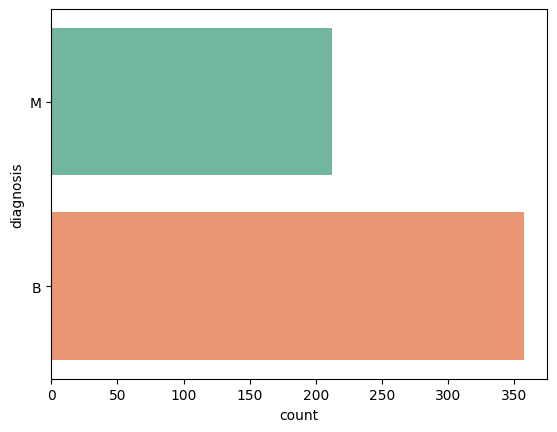

In [ ]:
sns.countplot(y="diagnosis", data=df, palette="Set2")

## 1.- (0,5 puntos)

Realiza todo el preprocesamiento necesario. Elimina aquellos datos que sean muy dependientes de otros y transforma en categóricos con 3 valores los que miden el área, el diámetro y la compacidad.

Definimos un color que se usará más adelante:

In [ ]:
import matplotlib.colors as mcolors


# Crear una lista de colores
colores = ["white", "#003865"]

# Crear una paleta de colores personalizada
cmap = mcolors.LinearSegmentedColormap.from_list("mi_paleta", colores)

# Crear una lista de colores
colores = ["#FF671F","white", "#003865"]

# Crear una paleta de colores personalizada
cmap2 = mcolors.LinearSegmentedColormap.from_list("mi_paleta", colores)

Muestro una lista que contiene todas columnas. Nuestro objetivo es reducir el número de variables ya que sabemos por el enunciado que hay mucha dependencia. Consideramos como criterio que la dependencia mayor de 0,8 es alta y por tanto eliminaremos las columnas que tengan más alta la dependencia que el umbral definido..

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Mostramos la matriz de correlaciones utilizando la correlación muestral de Pearson. Para mostrarla utilizaremos un mapa de calor con el color establecio anteriormente. A través de este mapa de calor estableceremos que columnas se seleccionan eliminando la dependencia.

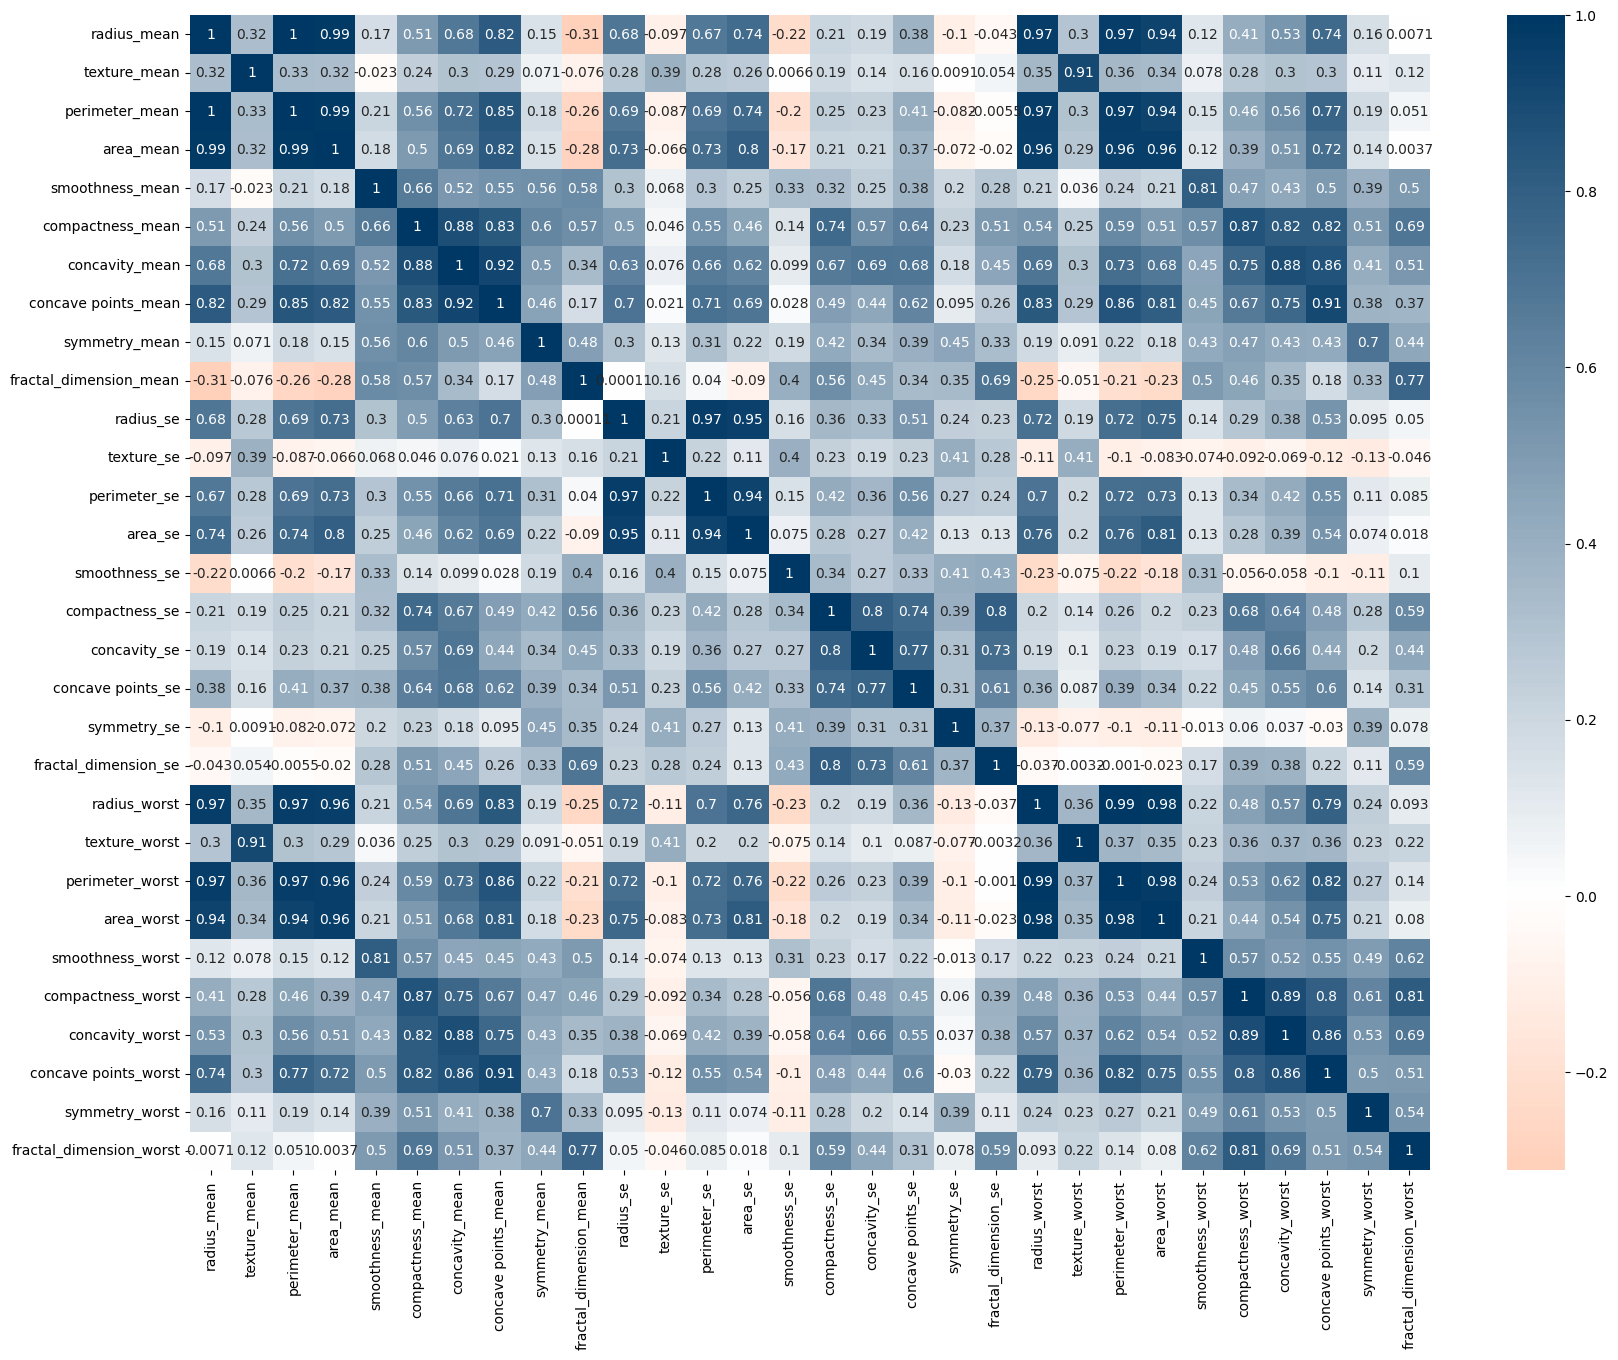

In [ ]:
columnas_numericas = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Calcula la matriz de correlaciones
corr_matrix = df[columnas_numericas].corr()

# print(corr_matrix)

# Si quieres visualizar esta matriz de correlaciones, puedes usar seaborn
# Ajusta el tamaño de la figura (ancho, alto)
plt.figure(figsize=(20, 15))

# Genera el mapa de calor
sns.heatmap(corr_matrix, cmap=cmap2, annot=True, center=0)

# Muestra la figura
plt.show()

Registro de como qué columnas se han limpiado por alta dependencia agrupadas por la columna con la que tienen alta dependencia:

1. radius_mean:
  'perimeter_mean',
  'area_mean'
  'concave points_mean'
  'radius_worst'
  'perimeter_worst'
  'area_worst'

2. texture_mean:
  'texture_worst'

3. smoothness_mean:
  'smoothness_worst'

4. compactness_mean:
  'concavity_mean'
  'compactness_worst'
  'concavity_worst',
  'concave points_worst'

5. fractal_dimension_mean:

6. radius_se:
  'perimeter_se'
  'area_se'

7. smoothness_se:

8. compactness_se:
  'concavity_se'
  'fractal_dimension_se'

Las que seleccionamos finales que se guardan son:

 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'smoothness_se',
 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst',
 'fractal_dimension_worst'

Una vez seleccionadas las columnas mostramos otra vez el mapa de calor:

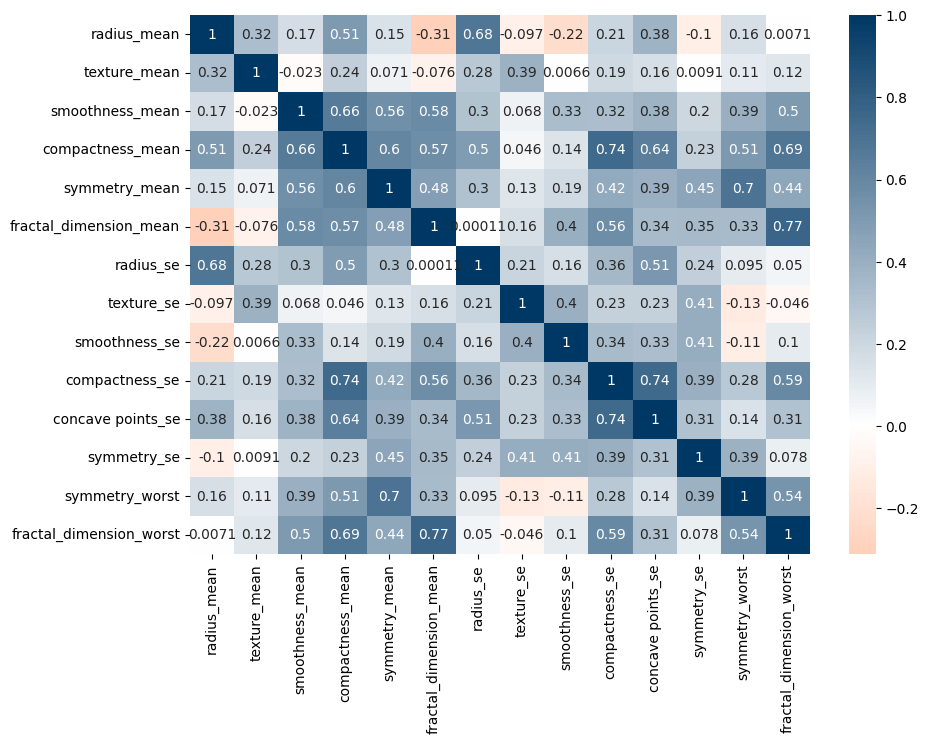

In [ ]:
columnas_seleccionadas = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'smoothness_se',
 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst',
 'fractal_dimension_worst']

# Calcula la matriz de correlaciones
corr_matrix = df[columnas_seleccionadas].corr()

# print(corr_matrix)

# Si quieres visualizar esta matriz de correlaciones, puedes usar seaborn
# Ajusta el tamaño de la figura (ancho, alto)
plt.figure(figsize=(10, 7))

# Genera el mapa de calor
sns.heatmap(corr_matrix, cmap=cmap2, annot=True, center=0)

# Muestra la figura
plt.show()

Vemos que ahora ninguna columna supera 0,8 de correlación, y además, que el número de columnas se ha reducido drásticamente facilitando el análisis y asegurandose más independencia.

Guardamos en la base de datos la columna objetivo y las variables seleccionadas:

In [ ]:
df = df[['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'smoothness_se',
 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst',
 'fractal_dimension_worst']]

Por último, siguiendo las especificaciones del enunciado para terminar de procesar la base de datos, se ha transformado en categórica las variables especificadas, que miden el radio y la compacidad (en este caso, ya no hay columnas de área).

Para seleccionar los tres intervalos, hemos decidido hacerlo de acuerdo con los cuartiles de los datos. Específicamente, hemos utilizado la función `pd.qcut()` para dividir los datos en tres cuartiles. Cada valor en las variables especificadas se clasifica en uno de estos cuartiles según el intervalo en el que cae.

La ventaja de usar `pd.qcut()` sobre `pd.cut()` (que era la que se iba a usar en primer lugar) es que `pd.qcut()` asegura que cada intervalo contiene aproximadamente el mismo número de observaciones, lo que puede ser más representativo de la estructura de los datos, especialmente si los datos están sesgados o tienen una distribución inusual. En contraste, `pd.cut()` simplemente divide el rango total de los datos en intervalos de igual tamaño, sin tener en cuenta la distribución de los datos. Por lo tanto, al usar `pd.qcut()`, hemos podido obtener una mejor representación de nuestros datos.

In [ ]:
diameter_cols = ["radius_mean"]
compactness_cols = ["compactness_mean", "compactness_se"]

for cols in diameter_cols+compactness_cols:
    df[cols] = pd.qcut(df[cols], 3, labels=[0,1,2])

<ipython-input-81-a24cc68b4cf4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = pd.qcut(df[cols], 3, labels=[0,1,2])


Si mostramos que ha pasado con la variable vemos que se ha dividido de forma uniforme como se esperaba.

In [ ]:
df.value_counts("radius_mean")

radius_mean
0    191
2    190
1    188
Name: count, dtype: int64

## 2.- (0,5 puntos)

Crea los distintos clasificadores en el que utilices al menos dos criterios de división distintos o medidas de desorden. Calcula el error en cada uno de ellos y elige el qué mejor clasifique.

Las bibliotecas necesarias para aplicar arboles de decisión son:

In [ ]:
# Dividir los datos
from sklearn.model_selection import train_test_split

# Crear la clase del modelo
from sklearn.tree import DecisionTreeClassifier

# Evaluar el modelo
from sklearn.metrics import accuracy_score

# Mostrar el arbol
from sklearn.tree import plot_tree

In [ ]:
# max_depth=3, min_samples_split=5, min_samples_leaf=2

Utilizamos el help de python para poder conocer que contiene la instrucción, los hiperparametros y otra información importante:

In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

Dividimos los datos utilizando la instrucción 'train_test_split':

In [ ]:
X = df.drop(columns=["diagnosis"])
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos un árbol de decisión con criterio de dvisión Gini y otro con Entropía y mostramos la precisón de ambos arboles.

In [ ]:
# Entrenar un árbol de decisión con criterio Gini
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train, y_train)
y_pred_tree_gini = tree_gini.predict(X_test)
accuracy_tree_gini = accuracy_score(y_test, y_pred_tree_gini)
error_tree_gini = 1-accuracy_tree_gini

# Entrenar un Random Forest con criterio Entropía
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train, y_train)
y_pred_tree_entropy = tree_entropy.predict(X_test)
accuracy_tree_entropy = accuracy_score(y_test, y_pred_tree_entropy)
error_tree_entropy = 1-accuracy_tree_entropy

# Mostrar las precisiones y los errores
print(f"Árbol de Decisión (Gini) - Precisión: {accuracy_tree_gini:.4f}, Error: {error_tree_gini:.4f}")
print(f"Árbol de Decisión (Entropía) - Precisión: {accuracy_tree_entropy:.4f}, Error: {error_tree_entropy:.4f}")

Árbol de Decisión (Gini) - Precisión: 0.8947, Error: 0.1053
Árbol de Decisión (Entropía) - Precisión: 0.9035, Error: 0.0965


Comprobamos como en este caso el método que mejor está predicioendo es el método de la entropía, consiguiendo una precisión ligeramente superior.

Ahora de cara al apartado 4 se van diseñar dos modelos que tengan unos hiperparámetros para tratar de ajustar el overfitting y encontrar un arbol que sea más sencillo generalizando lo máximo posible.

Principalemnete los hiperparámetros se han considerado importantes son:
1. max_depth: La profundidad máxima para asegurarse de crear las reglas lo más generales posibles y poder comentarlas en el apartado 4.
2. min_samples_leaf: Para ajustar el total de casos mínimo por nodo para no crear hojas con muy pocos nodos y reglas demasiado sobreajustadas.
3. min_impurity_decrease: Para ajustar cuantose divide y que solo lo haga en casos en los que sean suficientemente buenos.

In [ ]:
# Entrenar un árbol de decisión con criterio Gini
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42,
              max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=10)
tree_gini.fit(X_train, y_train)
y_pred_tree_gini = tree_gini.predict(X_test)
accuracy_tree_gini = accuracy_score(y_test, y_pred_tree_gini)
error_tree_gini = 1-accuracy_tree_gini

# Entrenar un Random Forest con criterio Entropía
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42,
              max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=20)
tree_entropy.fit(X_train, y_train)
y_pred_tree_entropy = tree_entropy.predict(X_test)
accuracy_tree_entropy = accuracy_score(y_test, y_pred_tree_entropy)
error_tree_entropy = 1-accuracy_tree_entropy

# Mostrar las precisiones y los errores
print(f"Árbol de Decisión (Gini) - Precisión: {accuracy_tree_gini:.4f}, Error: {error_tree_gini:.4f}")
print(f"Árbol de Decisión (Entropy) - Precisión: {accuracy_tree_entropy:.4f}, Error: {error_tree_entropy:.4f}")

Árbol de Decisión (Gini) - Precisión: 0.9211, Error: 0.0789
Árbol de Decisión (Entropy) - Precisión: 0.9035, Error: 0.0965


Podemos comprobar como al hacer ajustar el sobrentrenamiento el modelo de GINI ha mejorado y ahora tiene mayor precisión alcanzando el 92%. Mientras que el modelo de Entropía sigue teniendo la misma precisión, es decir, que aunque hemos reducido mucho el número de hojas sigue prediciendo igual de bien, lo que significa que antes tenía mucho sobreajuste.

## 3.- (0,5 punto)

Dibuja los modelos elegidos en el punto anterior.

A continuación se dibujan ambos modelos:

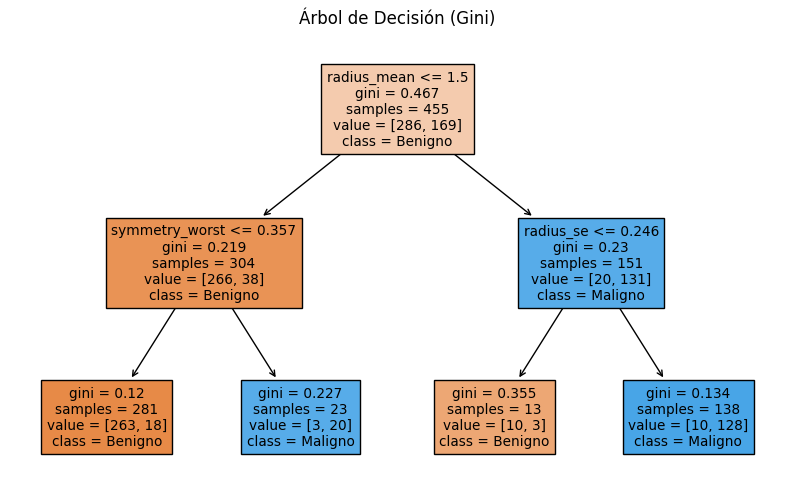

In [ ]:
# Mostrar el árbol de decisión (Gini)
plt.figure(figsize=(10, 6))
plot_tree(tree_gini, filled=True, feature_names=X.columns, class_names=["Benigno", "Maligno"])
plt.title("Árbol de Decisión (Gini)")
plt.show()

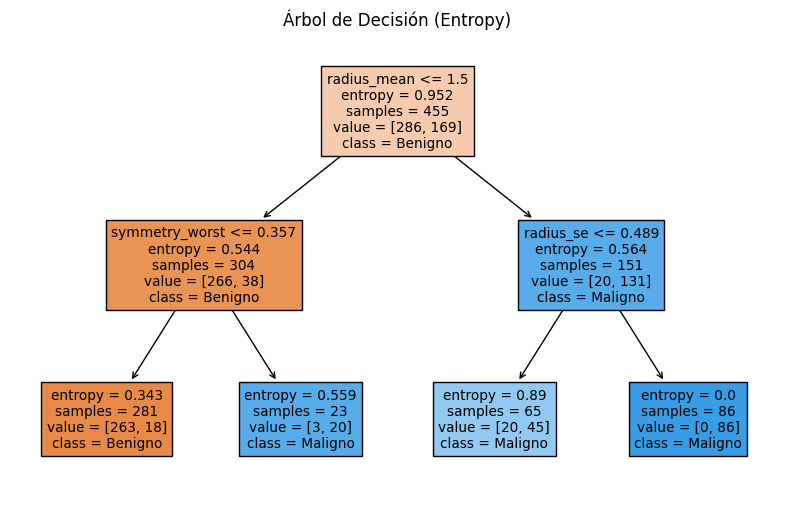

In [ ]:
# Mostrar el árbol de decisión (Entropy)
plt.figure(figsize=(10, 6))
plot_tree(tree_entropy, filled=True, feature_names=X.columns, class_names=["Benigno", "Maligno"])
plt.title("Árbol de Decisión (Entropy)")
plt.show()

## 4.- (0,5 punto)

Selecciona dos reglas que sean las que generalicen lo menos posible y otras dos que especialicen lo menos posible. Interprétalas. Si la estructura obtenida para sacar las reglas es demasiado grande repite el proceso para un 10% de los datos.

Como se ha explicado en el apartado 2 para reducir el arbol se han usado hiperaparmetros que han mejorado el arbol en vez de repetir el proceso con el 10% de los datos. Tras intenntar encontrar las peores reglas como pide el enunciado se ha comprobado como al reducir el sobrentrenamiento ya no hay reglas malas y el número de reglas es mínimo.

Se va repetir el proceso, pero modeificando menos los hiperparámetros para permitir cierto sobreajuste que haga que apatrezcan reglas que generalicen poco y se especialicen poco.

In [ ]:
# Entrenar un árbol de decisión con criterio Gini
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42,
              max_depth=4, min_impurity_decrease=0.005, min_samples_leaf=5)
tree_gini.fit(X_train, y_train)
y_pred_tree_gini = tree_gini.predict(X_test)
accuracy_tree_gini = accuracy_score(y_test, y_pred_tree_gini)
error_tree_gini = 1-accuracy_tree_gini

# Entrenar un Random Forest con criterio Entropía
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42,
              max_depth=4, min_impurity_decrease=0.02, min_samples_leaf=5)
tree_entropy.fit(X_train, y_train)
y_pred_tree_entropy = tree_entropy.predict(X_test)
accuracy_tree_entropy = accuracy_score(y_test, y_pred_tree_entropy)
error_tree_entropy = 1-accuracy_tree_entropy

# Mostrar las precisiones y los errores
print(f"Árbol de Decisión (Gini) - Precisión: {accuracy_tree_gini:.4f}, Error: {error_tree_gini:.4f}")
print(f"Árbol de Decisión (Entropy) - Precisión: {accuracy_tree_entropy:.4f}, Error: {error_tree_entropy:.4f}")

Árbol de Decisión (Gini) - Precisión: 0.8684, Error: 0.1316
Árbol de Decisión (Entropy) - Precisión: 0.9123, Error: 0.0877


Mostramos los nuevos arboles:

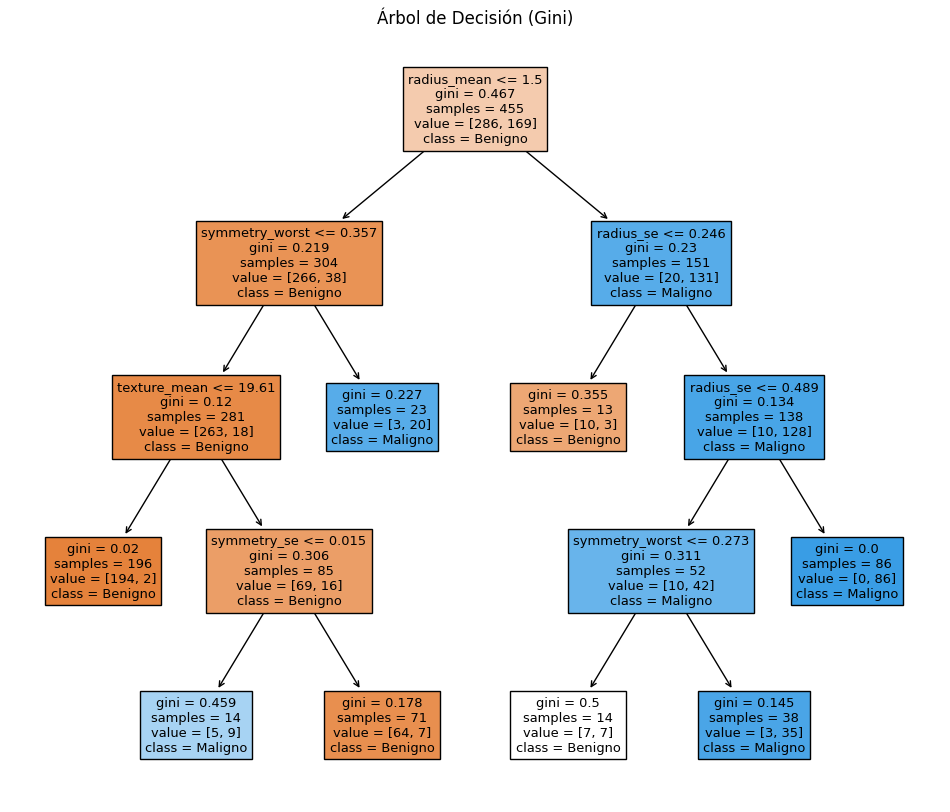

In [ ]:
# Mostrar el árbol de decisión (Gini)
plt.figure(figsize=(12, 10))
plot_tree(tree_gini, filled=True, feature_names=X.columns, class_names=["Benigno", "Maligno"])
plt.title("Árbol de Decisión (Gini)")
plt.show()

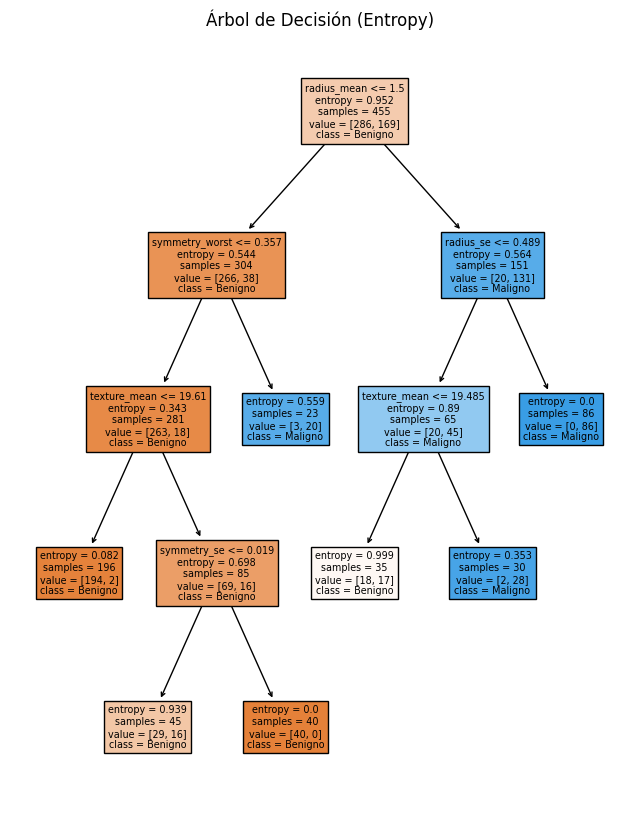

In [ ]:
# Mostrar el árbol de decisión (Entropy)
plt.figure(figsize=(8, 10))
plot_tree(tree_entropy, filled=True, feature_names=X.columns, class_names=["Benigno", "Maligno"])
plt.title("Árbol de Decisión (Entropy)")
plt.show()

Cuando decimos que una regla generaliza poco, nos referimos a que la regla es muy específica y sólo se aplica a un número limitado de casos o situaciones. En el contexto del aprendizaje automático, una regla que generaliza poco puede ser un signo de sobreajuste (overfitting).

Por otro lado, cuando decimos que una regla especifica poco, nos referimos a que la regla es muy general y se aplica a un amplio número de casos o situaciones. En el contexto del aprendizaje automático, una regla que especifica poco puede ser un signo de subajuste (underfitting).

El sobreajuste ocurre cuando un modelo de aprendizaje automático se ajusta demasiado a los datos de entrenamiento, aprendiendo detalles y ruido específicos de estos datos hasta el punto de que afecta negativamente el rendimiento del modelo en datos nuevos o no vistos. En otras palabras, el modelo no es capaz de generalizar bien a partir de los datos de entrenamiento a los datos de prueba.

El subajuste, por otro lado, ocurre cuando un modelo de aprendizaje automático es demasiado simple para capturar todos los patrones relevantes en los datos. Un modelo subajustado puede tener un rendimiento deficiente tanto en los datos de entrenamiento como en los de prueba porque no ha aprendido suficientes detalles de los datos de entrenamiento.

Por lo tanto, encontrar el equilibrio correcto entre la generalización y la especificidad es una parte crucial del diseño y entrenamiento de modelos de aprendizaje automático.

Dicho esto, las dos reglas seleccionadas que generalizan lo menos posible son:

1. $\{radius\_mean \leq 1.5, symmetry\_worst \leq 0,357 ,texture\_mean \geq 19,61 , symmetry\_se \leq 0,015  \} \Rightarrow  Maligno$

2. $\{radius\_mean \geq 1.5, radius\_se \leq 0,246 \} \Rightarrow Benigno$

La Regla 1 tiene una cobertura de 14 personas y detecta correctamente 9. Esta regla surge porque esta detectando dentro de la parte izquierda del árbol de decisión de Gini donde la mayoría tienen clase benigno un número de malignos muy inferior, y tratando de minimizar el error y clasificarlos correctamente ha surgido esta regla que no mejora la precisión del modelo porque como explicaba antes está demasiado sobreajustada, es decir, generaliza poco.

Esto mismo pasa en la Regla 2, pero esta vez en la parte derecha donde la mayoría de los pacientes son de la clase maligno, el árbol trata de clasificar cómo son esos que cumpliendo algunas restricciones y pareciendose a los de la clase maligno son distintos en alguna variable. El problema es que otra vez, esta regla podría apuntar a que está sobreentrenando, porque solo tiene una cobertura de 14 pacientes y detecta correctamente 10. En este caso, esta regla aunque si puede ser fruto del sobreentrenamiento es notablemente mejor que la Regla 1, parece que sí ayuda al modelo a mejorar su precisión y la podemos encontrar también en el modelo de precisión 92%. Por lo que aunque generaliza poco sí es una buena regla.

Por otro lado, las dos reglas seleccionadas que especializan lo menos posible son:

1. $\{radius\_mean \leq 1.5, symmetry\_worst \leq 0,357 ,texture\_mean \geq 19,61 , symmetry\_se \leq 0,015  \} \Rightarrow  Maligno$

2. $\{radius\_mean \geq 1.5, radius\_se \leq 0,246 \} \Rightarrow Benigno$

La Regla 1 ...

La Regla 2 ...

## 5.- (1 punto)

Usa tu clasificador para clasificar a 5 individuos que no se hayan usado en los pasos anteriores. Dichos individuos deberán presentar diferentes situaciones.

In [ ]:
# Seleccionar 5 individuos del conjunto de prueba
X_new = X_test.sample(5, random_state=42)

# Predecir utilizando los clasificadores entrenados
y_pred_tree_gini_new = tree_gini.predict(X_new)
y_pred_tree_entropy_new = tree_entropy.predict(X_new)

# Crear un DataFrame para mostrar los resultados
results_df = pd.DataFrame({
    "Individuo": X_new.index,
    "Árbol de Decisión (Gini)": y_pred_tree_gini_new,
    "Árbol de Decisión (Entropía)": y_pred_tree_entropy_new,
    "Clase": data.loc[X_new.index]['diagnosis']
})

# Mostrar los resultados
print(results_df)

     Individuo Árbol de Decisión (Gini) Árbol de Decisión (Entropía) Clase
132        132                        M                            M     M
540        540                        B                            B     B
104        104                        B                            B     B
331        331                        M                            M     B
457        457                        B                            B     B


# Práctica 2 (TCGA)

Valor (2 puntos)

TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer  (NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos. Su objetivo  principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.
Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1. Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por el diagrama de tallos y hojas). Muestra las distintas tablas de distribución. (1 punto)

2. Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10 clientes que no hayas usado para entrenar los modelos. (1 punto)

## 1.- (1 punto)

Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por el diagrama de tallos y hojas). Muestra las distintas tablas de distribución.

En primer lugar, se carga la base de datos con la que vamos a trabajar y se realiza y una visualización previa de los datos:

In [ ]:
directorio = 'TCGA.csv'
data = pd.read_csv(directorio)

Se crea una copia del dataset para no perder los datos originales:

In [ ]:
df = data.copy()

Representamos los datos para ver su formato.

In [ ]:
# Visualización de los datos.
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


La base de datos representan características de pacientes con cáncer en la que se incluyen genomas importantes en el desarrollo del cáncer guardando en cada cliente si alguno de estos genomas a mutado o no.

In [ ]:
# Dimensiones de la base de datos.
df.shape

(862, 27)

En la base de datos hay 862 pacientes de cáncer, cada uno con 27 variables.

In [ ]:
# Características de cada paciente
print(df.columns.tolist())

['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


In [ ]:
for column_name in df.columns:
  # Eliminar los espacios adicionales al final del nombre de la columna
  column_name = column_name.strip()

  if column_name in ['Case_ID', 'Age_at_diagnosis']:
      continue

  # Imprimir el nombre de la columna y sus valores únicos
  print("Valores únicos de", column_name, ":\n", df[column_name].unique().tolist())
  print()

Valores únicos de Grade :
 ['LGG', 'GBM']

Valores únicos de Project :
 ['TCGA-LGG', 'TCGA-GBM']

Valores únicos de Gender :
 ['Male', 'Female', '--']

Valores únicos de Primary_Diagnosis :
 ['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', '--', 'Glioblastoma']

Valores únicos de Race :
 ['white', 'asian', 'black or african american', '--', 'not reported', 'american indian or alaska native']

Valores únicos de IDH1 :
 ['MUTATED', 'NOT_MUTATED']

Valores únicos de TP53 :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de ATRX :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de PTEN :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de EGFR :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de CIC :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de MUC16 :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de PIK3CA :
 ['MUTATED', 'NOT_MUTATED']

Valores únicos de NF1 :
 ['NOT_MUTATED', 'MUTATED']

Valores únicos de PIK3R1 :
 ['NOT_MUTATED',

Las variables que tenemos en nuestra base de datos son las siguientes:

* **Grade**: La clasificación del grado del tumor, que indica el grado de agresividad del cáncer. Variable categórica que toma dos valores, 'LGG' y 'GBM', que se refieren a diferentes grados de gliomas, un tipo de tumor cerebral. 'LGG' se refiere a gliomas de bajo grado, que generalmente son menos agresivos, mientras que 'GBM' se refiere a glioblastomas multiformes, que son más agresivos y malignos.

* **Project**: El proyecto al que pertenece la muestra de datos. Hay dos proyectos, uno para grado de cáncer. Toma dos valores: 'TCGA-LGG' y 'TCGA-GBM'.

* **Case_ID**: Identificador único para cada caso o paciente. Variable categórica.

* **Gender**: El género del paciente, variable categórica generalmente codificada como masculino (Male) o femenino (Female).

* **Age_at_diagnosis**: La edad del paciente en el momento del diagnóstico del cáncer. Variable continua.

* **Primary_Diagnosis**: El diagnóstico primario del tipo de cáncer. Variable objetivo (la que queremos predecir) y categórica que toma los siguientes valores (las distintas clases de cáncer en las que vamos a clasificar):
```
| Diagnóstico                  |
|------------------------------|
| Oligodendroglioma, NOS       |
| Mixed glioma                 |
| Astrocytoma, NOS             |
| Astrocytoma, anaplastic      |
| Oligodendroglioma, anaplastic|
| Glioblastoma                 |
```

* **Race**: La raza del paciente. Variable categórica que toma los valores: 'white', 'asian', 'black or african american', 'not reported' y 'american indian or alaska native'

* **IDH1, TP53, ATRX, PTEN, EGFR, CIC, MUC16, PIK3CA, NF1, PIK3R1, FUBP1, RB1, NOTCH1, BCOR, CSMD3, SMARCA4, GRIN2A, IDH2, FAT4, PDGFRA**:

  Estos son genes específicos o marcadores genéticos asociados con el cáncer. Todos variables categóricas que toman los valores 'NOT_MUTATED', 'MUTATED'.
  
  Más concretamente:
  - **IDH1** es una enzima clave en el ciclo del ácido cítrico y el metabolismo celular. Mutaciones en el gen IDH1 están asociadas con ciertos tipos de cáncer, como gliomas y leucemias mieloides agudas, y pueden tener implicaciones en el diagnóstico y tratamiento del cáncer.
  - **TP53** es un gen supresor de tumores que juega un papel crucial en la prevención del desarrollo de cáncer al controlar la proliferación celular y la apoptosis. Mutaciones en TP53 son comunes en una variedad de cánceres humanos y pueden contribuir al desarrollo y progresión del cáncer.
  - **ATRX** es una proteína involucrada en la regulación de la estructura del ADN y la función de los telómeros. Mutaciones en el gen ATRX están asociadas con ciertos tipos de cáncer, especialmente gliomas y tumores neuroendocrinos, así como con el síndrome de ATR-X, un trastorno genético raro.
  - **PTEN** es un gen supresor de tumores que regula el crecimiento celular y la supervivencia al inhibir la vía de señalización PI3K/AKT. Las mutaciones en PTEN son comunes en varios tipos de cáncer y pueden contribuir al desarrollo y progresión de la enfermedad.
  - **EGFR** es el receptor del factor de crecimiento epidérmico, una proteína que regula el crecimiento y la proliferación celular. Mutaciones en el gen EGFR son comunes en varios tipos de cáncer, como el cáncer de pulmón, y pueden promover el crecimiento tumoral y la resistencia a la terapia dirigida.
  - **CIC** es un gen supresor de tumores que regula la expresión génica y la proliferación celular. Mutaciones en el gen CIC están asociadas con varios tipos de cáncer, incluidos gliomas y tumores cerebrales, y pueden contribuir al desarrollo de la enfermedad.
  - **MUC16** es una proteína de membrana mucinosa que se encuentra en la superficie de las células. En el cáncer, MUC16 se asocia comúnmente con tumores de ovario y se utiliza como biomarcador para el diagnóstico y seguimiento de la enfermedad.
  - **PIK3CA** es un gen que codifica la subunidad alfa de la enzima fosfatidilinositol 3-quinasa (PI3K). Mutaciones en PIK3CA son comunes en varios tipos de cáncer y pueden activar la vía de señalización PI3K/AKT, promoviendo el crecimiento y la supervivencia celular.
  - **NF1** es un gen supresor de tumores que codifica la proteína neurofibromina 1. Mutaciones en NF1 están asociadas con la neurofibromatosis tipo 1 (NF1), un trastorno genético caracterizado por el desarrollo de tumores benignos en el sistema nervioso y la piel.
  - **PIK3R1** es un gen que codifica la subunidad reguladora p85α de la enzima fosfatidilinositol 3-quinasa (PI3K). Esta proteína actúa como un regulador negativo de la vía de señalización PI3K/AKT y puede estar implicada en el desarrollo del cáncer cuando se muta.
  - **FUBP1** es un gen que codifica una proteína llamada factor de unión a la región flanqueante del pseudouridilato 1. Esta proteína está involucrada en la regulación de la expresión génica y puede desempeñar un papel en el desarrollo del cáncer cuando está alterada.
  - **RB1** es un gen supresor de tumores que codifica la proteína del retinoblastoma 1. Esta proteína regula el ciclo celular y la proliferación celular al inhibir la actividad de la proteína de desregulación del ciclo celular E2F. Mutaciones en RB1 están asociadas con el desarrollo de cáncer, incluido el retinoblastoma y otros tipos de tumores.
  - **NOTCH1** es un gen que codifica una proteína llamada receptor de Notch 1. Esta proteína desempeña un papel crucial en la regulación del desarrollo celular, la diferenciación y la proliferación. Mutaciones en NOTCH1 están asociadas con varios tipos de cáncer y pueden promover el crecimiento tumoral y la progresión de la enfermedad.
  - **BCOR** es un gen que codifica la proteína del regulador del complejo correpresor BCL6. Esta proteína participa en la regulación de la expresión génica y está implicada en el desarrollo de varios tipos de cáncer cuando se encuentra alterada.
  - **CSMD3** es un gen que codifica una proteína llamada CUB y dominio tipo Sushi que se encuentra en la membrana. Su función exacta no está completamente comprendida, pero se ha asociado con ciertos tipos de cáncer cuando está alterado.
  - **SMARCA4** es un gen que codifica una proteína llamada BRG1, que es una subunidad de la compleja proteína de remodelación de la cromatina SWI/SNF. Esta proteína juega un papel crucial en la regulación de la expresión génica al remodelar la estructura de la cromatina. Mutaciones en SMARCA4 están asociadas con varios tipos de cáncer y pueden contribuir al desarrollo de la enfermedad.
  - **GRIN2A** es un gen que codifica una subunidad de receptor de glutamato NMDA. Estas proteínas desempeñan un papel crucial en la transmisión sináptica y la plasticidad neuronal en el cerebro. Mutaciones en GRIN2A se han asociado con trastornos neurológicos, como la epilepsia y el trastorno del espectro autista.
  - **IDH2** es un gen que codifica la enzima isocitrato deshidrogenasa 2, que participa en el ciclo del ácido cítrico y el metabolismo celular. Mutaciones en IDH2 están implicadas en varios tipos de cáncer y pueden contribuir al desarrollo de la enfermedad.
  - **FAT4** es un gen que codifica una proteína llamada protocaderina-1, la cual se asocia con la adhesión celular y la regulación del crecimiento celular. Mutaciones en FAT4 se han asociado con diversos trastornos del desarrollo y ciertos tipos de cáncer.
  - **PDGFRA** es un gen que codifica el receptor del factor de crecimiento derivado de plaquetas alfa. Esta proteína está involucrada en la proliferación celular y la angiogénesis. Mutaciones en PDGFRA están asociadas con varios tipos de cáncer, incluyendo glioblastomas y tumores gastrointestinales.

Por lo tanto, como se pretende crear un clasificador de tipo de cáncer, la columna que nos aporta esta información es 'Primary_Diagnosis'.

Ahora, antes de continuar con el preprocesamiento de la base de datos, se va a seleccionar el clasificador indicado para poder saber a qué formato es necesario llevar los datos para que los procese el modelo que posteriormente se entrenará.

Como el enunciado dice: "Se pretende crear un clasificador de cáncer que tenga en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores", se entiende que se deben usar un **clasificador bayesiano**. Este, en python se implementa con la clase 'GaussianNB()', la cual requiere que las características categóricas (como Gender y Race) sean variables numéricas, por lo que hay que transformalas. También, habrá que transformar la variable 'Age_at_diagnosis', lo cual se realizará con los cuartiles creados por diagramas de tallos y hojas.

Se procede a analizar el tipo de variable que guarda cada columna y si exite algún Nan en alguna de ellas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

Como se puede comprobar, ninguna variable viene en el formato deseado, por lo que hay que realizar las mencionadas transformaciones. Después, se realizará una selección de variables, para alimentarle al modelo solo las consideradas importantes.

Antes de realizar las transformaciones, se eliminan valores no deseados y duplicados:

In [ ]:
print(df.duplicated().sum())# NO HAY FILAS DUPLICADAS
# df = df.drop_duplicates()

0


No hay valores duplicados. Por otro lado, los valores no deseados en este caso son valores de la forma "--" y aquellos que son de la raza "not reported". Estos se han detectado antes al sacar los valores únicos de cada columna.

En primer lugar, se entiende que "--" indica que ese registro en cierta columna no está rellenado, lo que se podría considerar como un Nan.

In [ ]:
count_dashes = (df == "--").sum().sum()

print("Número de veces que aparece '--' en el DataFrame:", count_dashes)

Número de veces que aparece '--' en el DataFrame: 17


Como no son significativos (solo hay 17), los eliminamos con el siguiente código:

In [ ]:
# Filtramos el DataFrame para mantener solo las filas que no contengan "--"
df = df[df.apply(lambda row: not any(val == "--" for val in row), axis=1)]

count_dashes = (df == "--").sum().sum()

print("Número de veces que aparece '--' después de filtrar en el DataFrame:", count_dashes)

Número de veces que aparece '--' después de filtrar en el DataFrame: 0


In [ ]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (857, 27)


El nuevo número de pacientes no es 862 - 17 = 845 debido a que debía de haber varios "--" en los mismos pacientes. A continuación, eliminamos los valores que tienen race = "not reported" porque consideramos que no aportan información significativa.

In [ ]:
count = (df == "not reported").sum().sum()

print("Número de veces que aparece 'not reported' en el DataFrame:", count)

Número de veces que aparece 'not reported' en el DataFrame: 18


Como no son significativos (solo hay 18), los eliminamos con el siguiente código:

In [ ]:
# Filtramos el DataFrame para mantener solo las filas que no contengan "--"
df = df[df.apply(lambda row: not any(val == "not reported" for val in row), axis=1)]

count = (df == "not reported").sum().sum()

print("Número de veces que aparece 'not reported' después de filtrar en el DataFrame:", count)

Número de veces que aparece 'not reported' después de filtrar en el DataFrame: 0


In [ ]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (839, 27)


Observemos las distribuciones de cada uno de nuestros atributos categóricos. En primer lugar, los binarios (2 categorías):

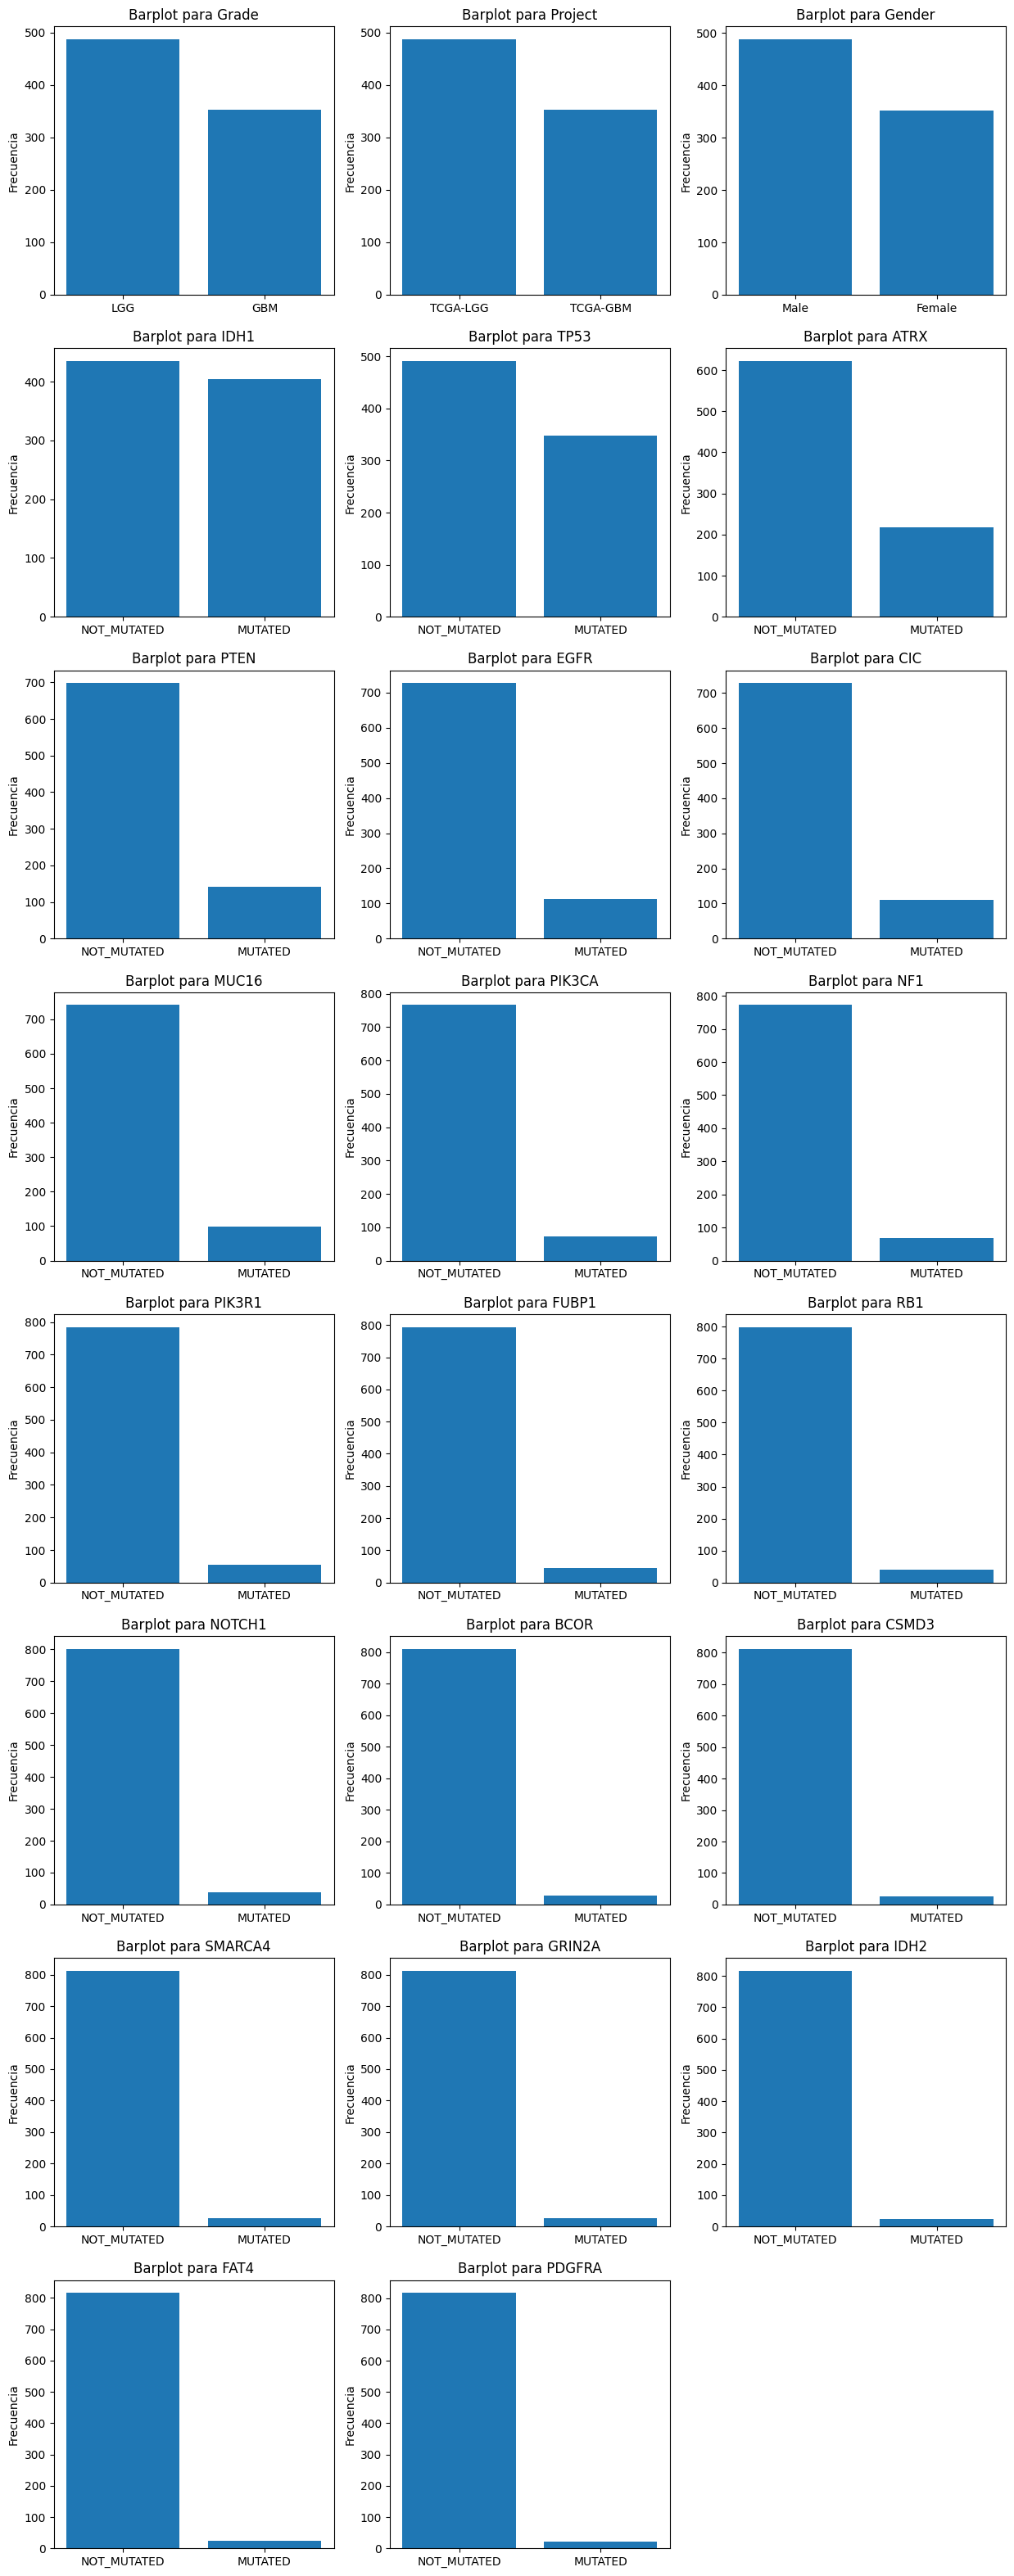

In [ ]:
# Calcular el número de subplots necesarios
num_rows = (len(df.columns) - 4) // 3

# Crear subplots
fig, axes = plt.subplots(num_rows+1, 3, figsize=(15, 5 * (num_rows + 1)))

# Contador
i = 0
j = 0

for column_name in df.columns:
  # Eliminar los espacios adicionales al final del nombre de la columna
  column_name = column_name.strip()

  if column_name in ['Case_ID', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race']:
      continue

  axes[i, j].bar(df[column_name].value_counts().index, df[column_name].value_counts())
  axes[i, j].set_title(f'Barplot para {column_name}')
  axes[i, j].set_xlabel('')
  axes[i, j].set_ylabel('Frecuencia')

  j += 1

  if j == 3:
    j = 0
    i += 1

# Ocultar el último subplots
axes[num_rows, 2].axis('off')

# Mostrar los gráficos
plt.show()

Y en segundo lugar, de las multicategóricas ('Primary_diagnosis' y 'Race'):

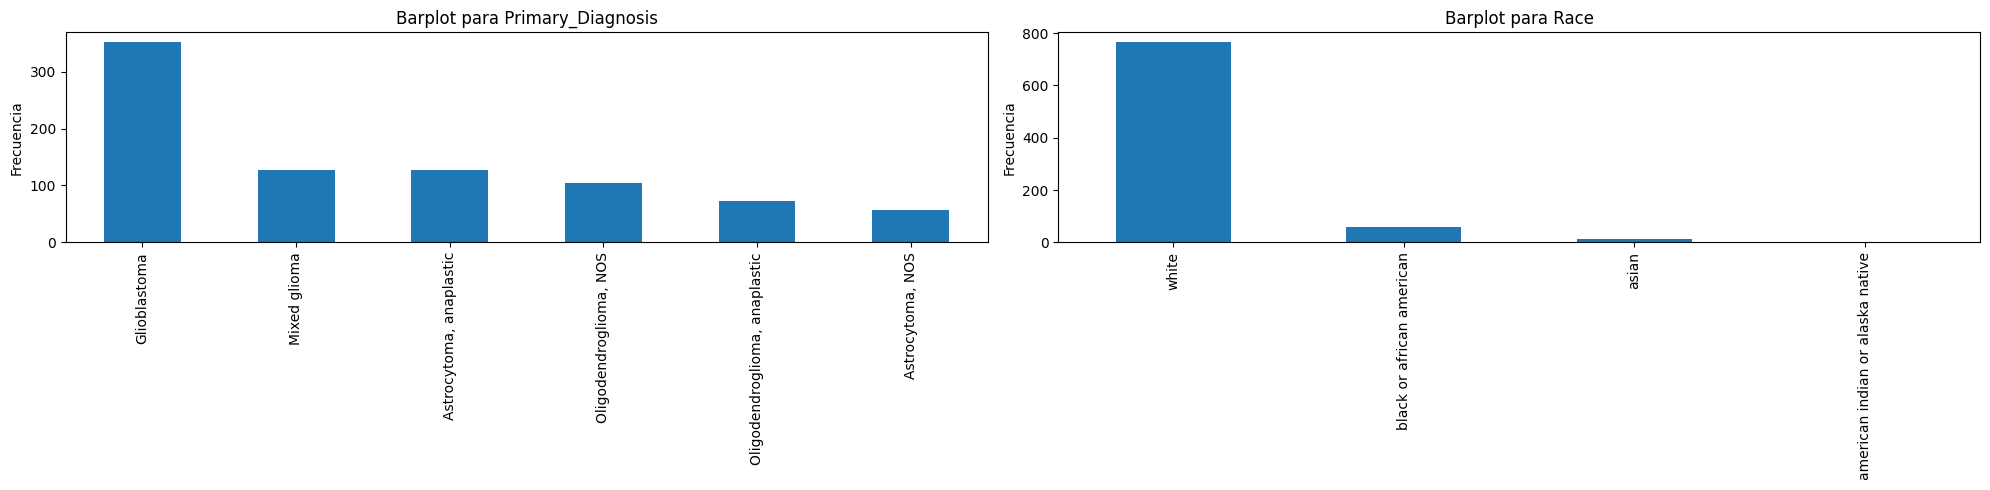

In [ ]:
# Lista de variables multicategóricas
variables_multicategoricas = ['Primary_Diagnosis', 'Race']

# Calcular el número de subplots necesarios
num_plots = len(variables_multicategoricas)

# Crear subplots
fig, axes = plt.subplots(1, num_plots, figsize=(10 * num_plots, 5))

# Iterar sobre las variables multicategóricas y crear los barplots
for i, variable in enumerate(variables_multicategoricas):
  # Crear el barplot para la variable actual
  df[variable].value_counts().plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Barplot para {variable}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Con la representación de las distribuciones se detectan dos anomalía: parece que no hay personas con 'Race' = 'american indian or alaska native', y las clases en las que queremos clasificar a nuestros pacientes están muy desequilibradas. Indaguemos sobre la primera anomalía:

In [ ]:
count = (df == "american indian or alaska native").sum().sum()

print("Número de veces que aparece 'american indian or alaska native' en el DataFrame:", count)

Número de veces que aparece 'american indian or alaska native' en el DataFrame: 1


Vemos que no es que no haya datos de 'american indian or alaska native', sino que hay solo uno y no se aprecia en el barplot. Se concluye que al ser la mayoría de pacientes blancos, esta variable no aporta información significativa y por lo tanto luego no se incluirá en el dataset de entrenamiento del clasificador.

En cuánto a la segunda anomalía, debido a que el clasificador que se quiere construir debe tener en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores, no se equilibran las clases debido a que si lo hiciésemos, estaríamos perdiendo información sobre estas "probabilidades".

Para continuar, se transforman los datos categóricos a numéricos:

In [ ]:
encoder = LabelEncoder()
encoded_values = {}

for column_name in df.columns:
    # Eliminar los espacios adicionales al final del nombre de la columna
    column_name = column_name.strip()

    if column_name in ['Case_ID', 'Age_at_diagnosis']:
        continue

    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column

    # Almacenar los valores únicos y su mapeo
    encoded_values[column_name] = dict(zip(df[column_name].unique(), encoder.inverse_transform(df[column_name].unique())))

    # Imprimir el nombre de la columna y sus valores únicos
    print("Valores únicos de", column_name, ":\n", sorted(df[column_name].unique().tolist()))
    print()

Valores únicos de Grade :
 [0, 1]

Valores únicos de Project :
 [0, 1]

Valores únicos de Gender :
 [0, 1]

Valores únicos de Primary_Diagnosis :
 [0, 1, 2, 3, 4, 5]

Valores únicos de Race :
 [0, 1, 2, 3]

Valores únicos de IDH1 :
 [0, 1]

Valores únicos de TP53 :
 [0, 1]

Valores únicos de ATRX :
 [0, 1]

Valores únicos de PTEN :
 [0, 1]

Valores únicos de EGFR :
 [0, 1]

Valores únicos de CIC :
 [0, 1]

Valores únicos de MUC16 :
 [0, 1]

Valores únicos de PIK3CA :
 [0, 1]

Valores únicos de NF1 :
 [0, 1]

Valores únicos de PIK3R1 :
 [0, 1]

Valores únicos de FUBP1 :
 [0, 1]

Valores únicos de RB1 :
 [0, 1]

Valores únicos de NOTCH1 :
 [0, 1]

Valores únicos de BCOR :
 [0, 1]

Valores únicos de CSMD3 :
 [0, 1]

Valores únicos de SMARCA4 :
 [0, 1]

Valores únicos de GRIN2A :
 [0, 1]

Valores únicos de IDH2 :
 [0, 1]

Valores únicos de FAT4 :
 [0, 1]

Valores únicos de PDGFRA :
 [0, 1]



Para obtener el mapeo inverso para una columna específica, se ejecuta el siguiente código. Este se utilizará más adelante para interpretar los resultados.

In [ ]:
column_name = 'Race'
inverse_mapping = encoded_values[column_name]
sorted_mapping = dict(sorted(inverse_mapping.items(), key=lambda item: item[0]))
print("Mapeo inverso para", column_name, ":\n", sorted_mapping)

Mapeo inverso para Race :
 {0: 'american indian or alaska native', 1: 'asian', 2: 'black or african american', 3: 'white'}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              839 non-null    int64 
 1   Project            839 non-null    int64 
 2   Case_ID            839 non-null    object
 3   Gender             839 non-null    int64 
 4   Age_at_diagnosis   839 non-null    object
 5   Primary_Diagnosis  839 non-null    int64 
 6   Race               839 non-null    int64 
 7   IDH1               839 non-null    int64 
 8   TP53               839 non-null    int64 
 9   ATRX               839 non-null    int64 
 10  PTEN               839 non-null    int64 
 11  EGFR               839 non-null    int64 
 12  CIC                839 non-null    int64 
 13  MUC16              839 non-null    int64 
 14  PIK3CA             839 non-null    int64 
 15  NF1                839 non-null    int64 
 16  PIK3R1             839 non-null    int64 
 17  FU

Se puede comprobar que las transformaciones se han realizado correctamente porque Dtype = 'int64'. Veámoslo en los datos:

In [ ]:
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,1,TCGA-DU-8164,1,51 years 108 days,4,3,0,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,TCGA-QH-A6CY,1,38 years 261 days,3,3,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,TCGA-HW-A5KM,1,35 years 62 days,0,3,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,1,TCGA-E1-A7YE,0,32 years 283 days,1,3,0,0,0,...,1,1,1,1,1,1,1,1,0,1
4,1,1,TCGA-S9-A6WG,1,31 years 187 days,1,3,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Para terminar con las transformaciones de los datos, transformamos la variable continua 'Age_at_diagnosis' a una categórica a través de sus cuartiles. En primer lugar, la pasamos de 'string' a un nº decimal:

In [ ]:
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].apply(lambda x: float(x.split()[0]) + float(x.split()[2])/365 if len(x.split()) > 2 else float(x.split()[0]))

In [ ]:
df['Age_at_diagnosis'].head(10)

0    51.295890
1    38.715068
2    35.169863
3    32.775342
4    31.512329
5    33.213699
6    35.186301
7    44.654795
8    33.958904
9    87.000000
Name: Age_at_diagnosis, dtype: float64

Se puede comprobar que la transformación de 'string' a 'float' se ha realizado correctamente. A continuación, creamos y mostramos el diagrama de tallos y hojas, siendo los tallos la parte entera de la edad y las hojas sus decimales:

In [ ]:
def diagrama_tallos_hojas(data, verbose = 1):
    tallos = {}
    for x in data:
        tallo = int(x)
        hoja = int(round((x - tallo) * 10)) # Redondeamos para obtener la hoja más cercana
        if tallo not in tallos:
            tallos[tallo] = []
        tallos[tallo].append(hoja)
    if verbose:
      for tallo, hojas in sorted(tallos.items()):
          print(f"{tallo} | {' '.join(map(str, sorted(hojas)))}")

    return tallos

diag_tallos_hojas = diagrama_tallos_hojas(df['Age_at_diagnosis'], verbose = 1)

14 | 4
17 | 7
19 | 2
20 | 2 2 3 8 8 10
21 | 7 7 8 8
22 | 0 6 6 8 8
23 | 0 3 4 5 8 10
24 | 1 1 2 4 4 7 8
25 | 1 2 2 3 5 6 6 7 9
26 | 1 1 3 3 5 6
27 | 0 2 5 6 7 8 8 8 9
28 | 1 2 3 5 6 7 9
29 | 1 1 2 2 4 4 5 6 6 6 6 8 8 9
30 | 1 1 2 2 3 3 4 4 4 7 7 7 8 8 9 9 9 9 9 10 10
31 | 0 0 0 0 1 3 4 5 5 5 6 7 7 8 9 10
32 | 1 1 2 3 3 4 4 4 5 5 5 5 7 8
33 | 0 1 1 2 2 3 3 5 5 5 6 7 7 9 9 9 10 10 10
34 | 1 1 2 3 4 4 4 4 5 5 6 6 7 8 9 9
35 | 1 1 1 1 2 2 2 2 2 2 2 5 7 9 10
36 | 1 2 2 2 2 3 5 5 5 6 6 7 8 8 9 10 10
37 | 1 1 1 1 2 2 3 3 3 4 5 7 8
38 | 0 0 0 1 1 2 2 2 3 4 4 4 5 6 6 6 6 7 7 8 8 9 9 9
39 | 0 1 2 2 2 4 4 4 5 5 5 7 8 8 8 9 10 10
40 | 0 1 1 2 2 3 5 6 6 7 7 8 8 8 9 9 10
41 | 0 2 2 2 2 3 3 3 5 6 6 7 9 9
42 | 0 1 2 4 5 6 7 8 8 9
43 | 1 4 4 4 4 4 5 6 6 7 7 8 9 9 9 10
44 | 1 2 2 2 3 4 4 6 6 6 6 6 6 7 7 9
45 | 1 1 2 3 4 6 6 6 7 8 8 9
46 | 1 2 3 4 5 6 6 9 9
47 | 1 2 2 3 3 4 5 5 5 6 6 6 7 7 8 8 8 9 10
48 | 2 2 3 4 4 5 5 5 6 7 7 7 9 9 9 9 9 10 10
49 | 0 4 5 5 6 7 7 8 8 8 8 8 9 9 10
50 | 0 2 2 4 4 5 5 5 5 6

Podemos comprobar como este diagrama nos da visualmente la forma de la distribución que sigue esta variable. Se comprueba con un histograma agrupando de la misma manera que en el diagrama (de parte entera en parte entera):

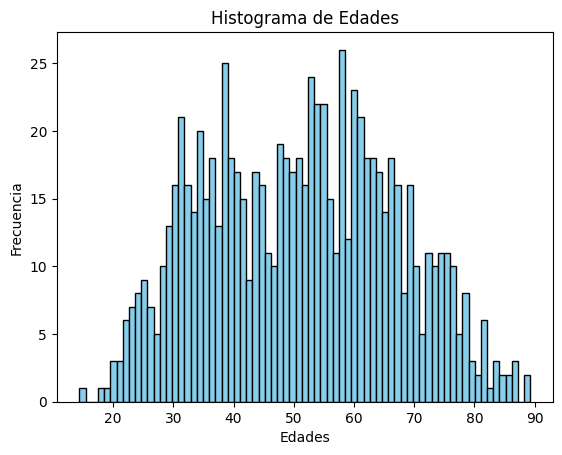

In [ ]:
def contar_tallos(data):
    tallos = {}
    for x in data:
        tallo = int(x)
        if tallo not in tallos:
            tallos[tallo] = []
    return len(tallos)

num_tallos = contar_tallos(df['Age_at_diagnosis'])
# print("Número de tallos:", num_tallos)

# Crea el histograma
plt.hist(df['Age_at_diagnosis'], bins=num_tallos, color='skyblue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Muestra el histograma
plt.show()

No obstante, comprobémoslo también con un histograma más distendido:

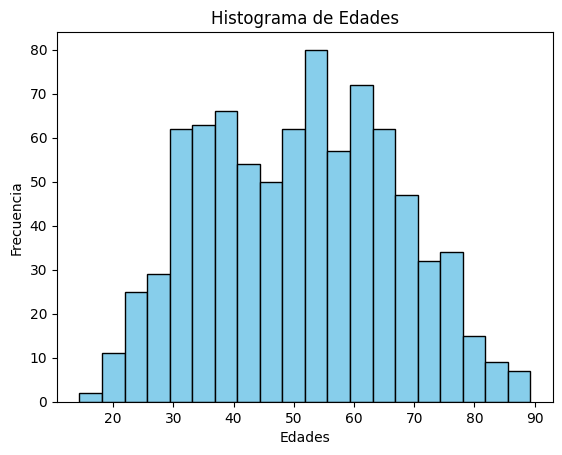

In [ ]:
# Crea el histograma
plt.hist(df['Age_at_diagnosis'], bins=20, color='skyblue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Muestra el histograma
plt.show()

Se observa en esta distribución, la cual se parece (un poco) a una distribución normal, que la mayoría de individuos se encuentran en la mitad de los datos, entre 30 y 60 años. Ahora se calculan los cuartiles de esta variable a partir del diagrama de tallos y hojas que hemos creado antes:

In [ ]:
def calcular_cuantil(tallos_hojas, q):
    # Ordenar las hojas de cada tallo
    hojas_ordenadas = []
    for tallo, hojas in tallos_hojas.items():
        hojas_ordenadas.extend([tallo + hoja / 10 for hoja in hojas])
    hojas_ordenadas.sort()

    # Calcular la posición del cuantil
    posicion_cuantil = q * len(hojas_ordenadas)

    # Devolver el valor del cuantil
    if posicion_cuantil.is_integer():
        cuantil = hojas_ordenadas[int(posicion_cuantil) - 1]
    else:
        pos_inf = int(posicion_cuantil)
        pos_sup = pos_inf + 1
        cuantil = (hojas_ordenadas[pos_inf - 1] + hojas_ordenadas[pos_sup - 1]) / 2

    return cuantil

cuartiles = []
q = 0
for _ in range(3):
  q += 0.25
  cuartiles.append(calcular_cuantil(diag_tallos_hojas, q))

print(cuartiles)

[38.0, 51.55, 62.8]


Y por último, categorizamos la edad con estos cuartiles calculados:

In [ ]:
# Define los límites de las categorías utilizando los cuartiles
limite_inferior = cuartiles[0]
mediana = cuartiles[1]
limite_superior = cuartiles[2]

# Categoriza los valores en cuatro categorías
def categorizar_edad(edad):
    if edad <= limite_inferior:
        return 1
    elif edad <= mediana:
        return 2
    elif edad <= limite_superior:
        return 3
    else:
        return 4

df['Age_at_diagnosis'] = df['Age_at_diagnosis'].apply(categorizar_edad)
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,1,TCGA-DU-8164,1,2,4,3,0,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,TCGA-QH-A6CY,1,2,3,3,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,TCGA-HW-A5KM,1,1,0,3,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,1,TCGA-E1-A7YE,0,1,1,3,0,0,0,...,1,1,1,1,1,1,1,1,0,1
4,1,1,TCGA-S9-A6WG,1,1,1,3,0,0,0,...,1,1,1,1,1,1,1,1,1,1


La selección de variables mencionada se realizará en el siguiente apartado.

## 2.- (1 punto)

Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10 clientes que no hayas usado para entrenar los modelos.

Se hace la siguiente selección de variables:

In [ ]:
selected_variables = ['Grade', 'Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN',
                      'EGFR','CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
                      'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

Se han omitido:
* **'Project'**, debido a que nos dice lo mismo de 'Grade'.
* **'Race'**, debido a que se ha visto antes que la mayoría de pacientes son blancos, por lo cual que pacientes de distintas razas no van a ser significativos para nuestro clasificador bayesiano.

In [ ]:
# Nos guardamos 10 datos de manera aleatoria para probarlos más tarde, como dice el enunciado.
test_df = df.sample(n=10, random_state=23)
df.drop(test_df.index, inplace = True)

test_df_y = test_df['Primary_Diagnosis']
test_df_X = test_df.drop('Primary_Diagnosis', axis=1)
test_df_X = test_df_X[selected_variables]

# Datos
X = df[selected_variables]
y = df['Primary_Diagnosis']

# División train-test:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=23)

# Clasificador Naive Bayes Gaussiano
nb_classifier = GaussianNB()

# Entrenamos el clasificador
nb_classifier.fit(train_X, train_y)

# Predecimos las etiquetas de clase en el conjunto de prueba
y_pred = nb_classifier.predict(test_X)

# Calculamos la precisión del clasificador
accuracy = accuracy_score(test_y, y_pred)

print("La precisión del clasificador Naive Bayes Gaussiano es:", accuracy)

La precisión del clasificador Naive Bayes Gaussiano es: 0.5180722891566265


Podemos observar que nuestro modelo es mejor en test que el modelo que eligiese al azar (6 clases -> prob de acierto: 1/6 = 0.166666...). No obstante, no es un modelo genial, ya que solo acierta en la mitad de los datos de prueba.

Con el objetivo de mejorar la precisión, se realiza un selección de variables más exhaustiva. Más concretamente, se estudia la correlación de las variables explicativas con la variable respuesta:

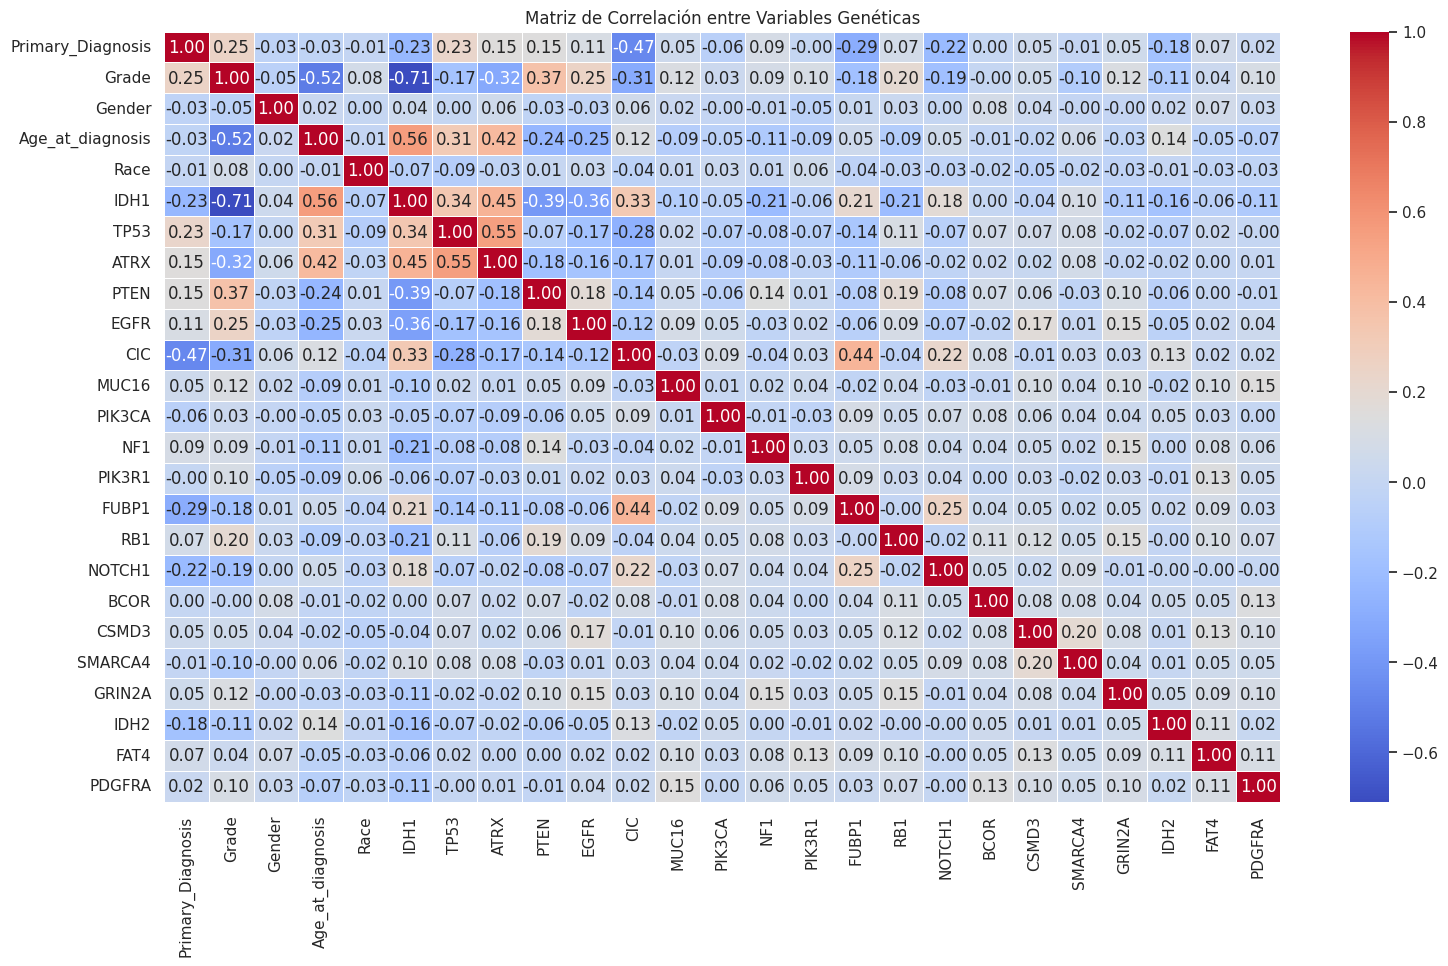

In [ ]:
# Calcular la matriz de correlación
corr_variables = ['Primary_Diagnosis', 'Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN',
                      'EGFR','CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
                      'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
corr_df = df[corr_variables]
correlation_matrix = corr_df.corr()

# Configurar el estilo de la matriz de correlación
sns.set(style="white")

# Crear una figura y un eje para el mapa de calor
plt.figure(figsize=(18, 10))

# Generar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Añadir título
plt.title("Matriz de Correlación entre Variables Genéticas")

# Mostrar el mapa de calor
plt.show()

A la vista de esta matriz de correlaciones, se hace una selección de aquellas variables que tengan una relación lineal mínimamente significativa (corr > 0.1) con 'Primary_Diagnosis' y posteriormente se añaden otras variables que también se consideran importantes para la clasificación del cáncer:

In [ ]:
# Establecer un umbral de correlación
threshold = 0.1

# Seleccionar variables con una correlación absoluta mayor que el umbral
selected_variables = correlation_matrix['Primary_Diagnosis'][abs(correlation_matrix['Primary_Diagnosis']) > threshold].index.tolist()
selected_variables.remove('Primary_Diagnosis')
selected_variables.append('Gender')
selected_variables.append('Age_at_diagnosis')
print(selected_variables)

['Grade', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'FUBP1', 'NOTCH1', 'IDH2', 'Gender', 'Age_at_diagnosis']


In [ ]:
test_df_y = test_df['Primary_Diagnosis']
test_df_X = test_df.drop('Primary_Diagnosis', axis=1)
test_df_X = test_df_X[selected_variables]

# Datos
X = df[selected_variables]
y = df['Primary_Diagnosis']

# División train-test:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=23)

# Clasificador Naive Bayes Gaussiano
nb_classifier = GaussianNB()

# Entrenamos el clasificador
nb_classifier.fit(train_X, train_y)

# Predecimos las etiquetas de clase en el conjunto de prueba
y_pred = nb_classifier.predict(test_X)

# Calculamos la precisión del clasificador
accuracy = accuracy_score(test_y, y_pred)

print("La precisión del clasificador Naive Bayes Gaussiano es:", accuracy)

La precisión del clasificador Naive Bayes Gaussiano es: 0.608433734939759


Así, nuestro modelo final tiene un 60.84% de precisión, lo que indica que falla en el 40% de los datos de test. Profundicemos más en los resultados:

In [ ]:
# Contar cuántas predicciones son correctas
correct_predictions_vector = []
for i in range(y_pred.shape[0]):
  correct_predictions_vector.append(y_pred[i] == test_y.iloc[i])
correct_predictions_vector = np.array(correct_predictions_vector)
correct_predictions = np.sum(correct_predictions_vector)

print(f'Número de predicciones correctas: {correct_predictions}')
print(f'Número de predicciones totales: {len(y_pred)}')

Número de predicciones correctas: 101
Número de predicciones totales: 166


In [ ]:
column_name = 'Primary_Diagnosis'
inverse_mapping = encoded_values[column_name]
sorted_mapping = dict(sorted(inverse_mapping.items(), key=lambda item: item[0]))
print("Mapeo inverso para", column_name, ":\n", sorted_mapping)

Mapeo inverso para Primary_Diagnosis :
 {0: 'Astrocytoma, NOS', 1: 'Astrocytoma, anaplastic', 2: 'Glioblastoma', 3: 'Mixed glioma', 4: 'Oligodendroglioma, NOS', 5: 'Oligodendroglioma, anaplastic'}


In [ ]:
target_names = ['Astrocytoma, NOS (Class 0)','Astrocytoma, anaplastic (Class 1)', 'Glioblastoma (Class 2)', 'Mixed glioma (Class 3)', 'Oligodendroglioma, NOS (Class 4)', 'Oligodendroglioma, anaplastic (Class 5)']
print(classification_report(test_y, y_pred, target_names = target_names, zero_division=0))

                                         precision    recall  f1-score   support

             Astrocytoma, NOS (Class 0)       0.20      0.93      0.32        14
      Astrocytoma, anaplastic (Class 1)       0.67      0.21      0.32        29
                 Glioblastoma (Class 2)       1.00      1.00      1.00        68
                 Mixed glioma (Class 3)       0.00      0.00      0.00        22
       Oligodendroglioma, NOS (Class 4)       0.56      0.53      0.54        19
Oligodendroglioma, anaplastic (Class 5)       0.80      0.29      0.42        14

                               accuracy                           0.61       166
                              macro avg       0.54      0.49      0.43       166
                           weighted avg       0.67      0.61      0.59       166



Gracias al 'classification_report', podemos detectar como nuestro modelo no realiza ninguna predicción para la clase 'Mixed glioma'. Puede que esté prediciendo todos ellos como 'Gliobastoma'. Comprobemoslo en la matriz de confusión:

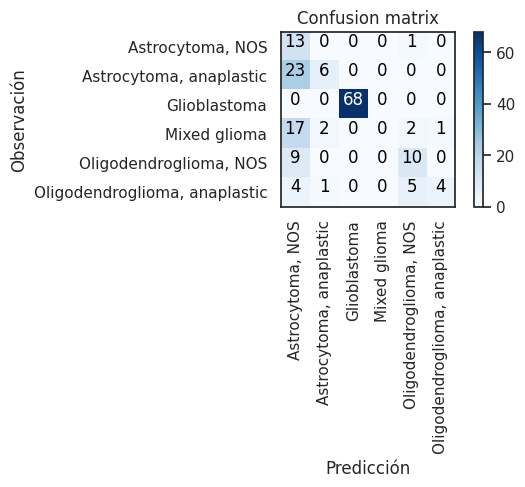

<Figure size 640x480 with 0 Axes>

In [ ]:
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(test_y, y_pred)
target_names = ['Astrocytoma, NOS','Astrocytoma, anaplastic', 'Glioblastoma',
                'Mixed glioma', 'Oligodendroglioma, NOS', 'Oligodendroglioma, anaplastic']
plot_confusion_matrix(confusion_mtx, classes = target_names)

Lo que podemos observar es que, en primer lugar la hipótesis de que el modelo estaba prediciendo todos los pacientes con 'Mixed glioma' como 'Glioblastoma' es incorrecta, ya que el modelo confunde sobre todo 'Mixed glioma' con 'Astrocytoma, NOS'.

Podemos ver que se ha obtenido un 60% de precisión debido a que hay muchos casos de 'Glioblastoma', y el modelo si sabe distinguir y clasificar esto, lo que nos lleva a concluir que nuestro modelo clasificador si sabe detectar el cáncer 'Glioblastoma'.

En cambio, el resto de cánceres los clasifica notablemente mal. Quizás los datos de los que disponemos no son suficiente para distinguir entre cánceres muy parecidos, que es donde se observa la dificultad del modelo para clasificar. Le cuesta clasificar entre 'Astrocytoma, NOS' y 'Astrocytoma, anaplastic', también entre 'Oligodendroglioma, NOS' y 'Oligodendroglioma, anaplastic'; y sobre todo, entre 'Mixed glioma' y 'Astrocytoma, NOS'.

¿Por qué puede estar ocurriendo esto? Por varias razones:

* **Superposición en las características**: Si las características utilizadas para entrenar el modelo tienen una superposición significativa entre las clases, el modelo puede tener dificultades para distinguir entre ellas.

* **Características insuficientes**: Si las características utilizadas para entrenar el modelo no son lo suficientemente discriminativas para distinguir entre tipos de cáncer, el modelo puede no ser capaz de capturar las diferencias sutiles entre estas clases.

* **Complejidad del modelo**: Puede que el modelo bayesiano sea demasiado simple para capturar la complejidad de los datos, y puede que tenga dificultades para aprender la relación entre las características y las clases. En este caso, utilizar un modelo más complejo o realizar ingeniería de características podría ayudar a mejorar el rendimiento del modelo.

Para concluir, usamos el modelo entrenado para predecir el cáncer de los 10 pacientes que nos hemos reservado al principio de este apartado, tal y como dice el enunciado:

In [ ]:
y_pred = nb_classifier.predict(test_df_X)

# Mapea las predicciones a las etiquetas de clase originales
y_pred_labels = [sorted_mapping[prediction] for prediction in y_pred]
test_df_y_labels = [sorted_mapping[prediction] for prediction in test_df_y]

print("Predicción de los 10 pacientes:\n", y_pred_labels)
print("Valores reales de los 10 pacientes:\n", test_df_y_labels)
print()

# Calculamos la precisión del clasificador
accuracy = accuracy_score(test_df_y, y_pred)

print("La precisión del clasificador en los 10 pacientes reservados de Naive Bayes Gaussiano es:", accuracy*100, "%")

Predicción de los 10 pacientes:
 ['Glioblastoma', 'Glioblastoma', 'Astrocytoma, NOS', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Astrocytoma, NOS', 'Oligodendroglioma, NOS']
Valores reales de los 10 pacientes:
 ['Glioblastoma', 'Glioblastoma', 'Astrocytoma, NOS', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Glioblastoma', 'Astrocytoma, NOS', 'Oligodendroglioma, NOS']

La precisión del clasificador en los 10 pacientes reservados de Naive Bayes Gaussiano es: 100.0 %


# Práctica	3	(Detección de malware)

Valor(2 puntos)

En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos
malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que
divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.

Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase
y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la
precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos
kernels? (1 punto)

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o
acierto ha funcionado el clasificador. (1 punto)

Se tienen cuatro tipos de clases en la base de datos de malware. Éstas son:

*   Fakerean: es un tipo de malware, un antivirus falso, que simula haber encontrado una infección en la computadora de la víctima.

*   Lolyda.AA1:  es un troyano que roba información sensible relacionada con juegos online populares y la envía a un atacante remoto. También puede descargar y ejecutar archivos arbitrarios. intenta buscar en la memoria del proceso en ejecución de varios juegos en línea populares con el fin de encontrar información particular, como la siguiente:

  *   Usuario
  *   Contraseña
  *   Dirección del servidor

 Esta información se envía a un servidor remoto.

*   Yuner.A: Esta amenaza intenta utilizar la función de ejecución automática de Windows para propagarse a través de unidades extraíbles, como memorias USB.

*   Agent.FYI: Agent es una familia muy amplia de programas, la mayoría de los cuales descargan e instalan adware o malware en la máquina de la víctima. Las variantes de Agent también pueden cambiar los ajustes de configuración del Explorador de Windows y/o de la interfaz de Windows.

## 1.- (1 punto)

Se van a utilizar super vector machines como clasificador ya que con ellos se pueden dibujar hiperplanos que separen a diferentes grupos, ademásm, son efectivos incluso en conjuntos de datos con un alto número de características (alta dimensionalidad). Esto las hace útiles en campos como el reconocimiento de imágenes donde los datos pueden tener muchas dimensiones.

Acontinuación, se procede a cargar los datos y adaptarlos para poder facilitar su clasificación.


In [ ]:
import cv2
import os
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import random

#drive.mount('/content/drive', force_remount=True)

#!unzip '/content/drive/MyDrive/LAB3Manu/Malware.zip' -d '/content/datasets/'

Como las imágenes ya están en escala de grises no hay un canal de profundidad mayor que 1, solamente procedemos a extraer las imágenes, las aplanamos y las guardamos en una matriz donde cada fila representa una imagen concreta aplanada.

In [ ]:
# Ruta al directorio principal.
dir_prl = '/content/datasets/'

# Listas para almacenar las imágenes y las etiquetas.
imagenes = []
etiquetas = []
c = 0
img = [0]*465 # Número de imágenes.

# Primero, accedemos a la carpeta que contiene las cuatro carpetas de clases.
carpetaprl = os.listdir(dir_prl)[0]

# Recorremos cada carpeta en el directorio principal.
for carpeta in os.listdir(os.path.join(dir_prl, carpetaprl)):

    # Recorremos cada archivo en la carpeta
    for archivo in os.listdir(os.path.join(dir_prl, carpetaprl, carpeta)):

        # Comprobamos si el archivo es una imagen .png.
        if archivo.endswith('.png'):

            # Leemos la imagen y la convertimos en una matriz.
            img[c] = cv2.imread(os.path.join(dir_prl, carpetaprl, carpeta, archivo), cv2.IMREAD_GRAYSCALE)
            # Aplanamos la matriz y la añadimos a la lista de imágenes.
            imagenes.append(img[c].flatten())
            # Añadimos la etiqueta de la imagen a la lista de etiquetas.
            etiquetas.append(carpeta)
            c = c + 1

# Convertimos las listas en arrays de numpy.
etiquetas = np.array(etiquetas)

Se visualizan 4 imágenes aleatorias para ver los tipos de dato que se están manipulando.

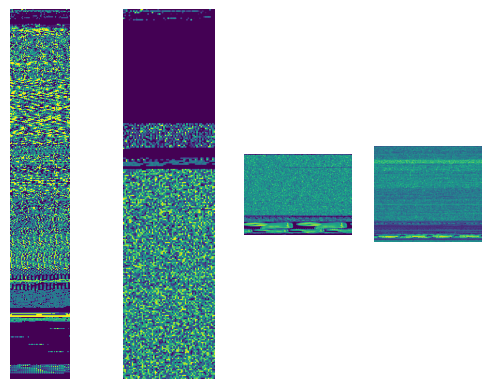

In [ ]:
# Crear una figura y subtramas.
fig, axs = plt.subplots(1, 4)
count = 0

for i in range(0,4):

    # Visualizar la imagen en la subtrama correspondiente.
    axs[i].imshow(img[random.randint(0,464)])
    axs[i].axis('off')  # para ocultar los ejes.

plt.show()

Como no todas las imagenes tienen las mismas dimensiones queda una matriz con un número de registros igual al número de imágenes pero el número de columnas no es homogéneo. Se procede a hacer un padding donde aquellas imágenes que tienen un número de columnas, dimensión, menor a la imagen con mayor dimensión, número de colummnas, se rellenan esos huecos con ceros.

In [ ]:
# PADDING

# Encuentra la longitud del vector de imagen más largo.
maxlen = max(len(img) for img in imagenes)

# Agrega ceros al final de los vectores de imagen hasta que todos tengan la
# misma longitud.
imagenespad = []

for img in imagenes:
    # Calcula cuántos ceros necesita agregar.
    padlen = maxlen - len(img)
    # Crea el vector de padding.
    padding = np.zeros(padlen)
    # Añade el padding al final del vector de imagen.
    imgpad = np.concatenate((img, padding))
    # Añade la imagen con padding a la lista.
    imagenespad.append(imgpad)

# Convierte la lista de imágenes con padding en un array de numpy.
imagenespad = np.array(imagenespad)

In [ ]:
# Comprobamos que la dimension es correcta.
imagenespad.shape

(465, 524544)

Se tienen un total de 465 imágenes y teniendo en cuenta la dimension más grande de imagen que son aquellas que pertenencen a la clase de Yuner.A, con una dimensión de 768x683 = 524544, representa el número de columnas de la matriz.

De esta froma, hemos podido comprobar que las imagenes se han cargado correctamente.

Visualizamos una de ellas:

In [ ]:
print(imagenespad[0])

# Se comprueba que la escala va de 0 a 255.
print('\nValor mínimo:',min(imagenespad[0]),'\nValor máximo:',max(imagenespad[0]))

[ 77.  90. 144. ...   0.   0.   0.]

Valor mínimo: 0.0 
Valor máximo: 255.0


Normalizaremos los datos para que la escala vaya de 0 a 1 y no de 0 a 255 ya que puede facilitar al modelo.

In [ ]:
imagenespad = imagenespad/255

In [ ]:
# Comprobamos
print(imagenespad[0])

Comprobamos que las etiquetas se cargaron correctamente.

In [ ]:
# Dimension de etiquetas.
print(etiquetas.shape)

print('\n',etiquetas[58])

Dividimos los datos en un conjunto de entrenamiento, otro de validación y uno último de 10 imágenes que utilizaremos en el segundo apartado para comprobar la precisión.

In [ ]:
from sklearn.model_selection import train_test_split

# Primero cogemos un conjunto de 10 imágenes del conjunto inicial de datos y los
# separamos del mismo.

datos_train, datos_10, etiquetas_train, etiquetas_10 = train_test_split(imagenespad, etiquetas, test_size = 0.02)

# Dividimos los datos en conjuntos de entrenamiento(80%) y prueba(20%)
datos_train, datos_test, etiquetas_train, etiquetas_test = train_test_split(datos_train, etiquetas_train, test_size=0.2)

Comprobamos que los datos se hayan divido correctamente.

In [ ]:
print('Dimensión de los datos de train:',datos_train.shape,'datos,',etiquetas_train.shape,'etiquetas\n')
print('Dimensión de los datos de test:',datos_test.shape,'datos,',etiquetas_test.shape,'etiquetas\n')
# Los siguientes deben ser 10.
print('Dimensión de los datos de comprobación:',datos_10.shape,'datos,',etiquetas_10.shape,'etiquetas\n')

Una vez sean cargado y adapatado los datos procedemos al uso de SVM (Super Vector Machine) para la clasificación.

Se va a estudiar qué modelo predice mejor, los modelos que se van a utilizar son uno sin kernel(lineal), uno polinómico y uno con kernel RBF (función de base radial).

Los SVM lineales funcionan bien si los datos son linealmente separables o si se tiene un número muy grande de características en relación con el número de muestras. No utiliza un kernel. En su lugar, intenta encontrar un hiperplano en el espacio de características que maximice el margen entre las clases.

Si los datos no fueran linealmente separables RBF puede ser útil. El kernel RBF puede mapear los datos a un espacio de mayor dimensión donde las clases son separables. El kernel RBF es una función de similitud que mide la “distancia” entre dos puntos en el espacio de características.

Por último, el SVM polinómico utiliza un kernel, que hace referencia a su nombre, para mapear los datos a un espacio de mayor dimensión donde las clases pueden ser separables. El kernel polinómico puede capturar interacciones entre características (por ejemplo, si una característica es el producto de otras dos) y puede proporcionar una flexibilidad adicional en comparación con el SVM lineal. El grado del polinomio puede afectar la complejidad del modelo y su capacidad para generalizar, es un hiperparámetro que se tendrá que especificar.


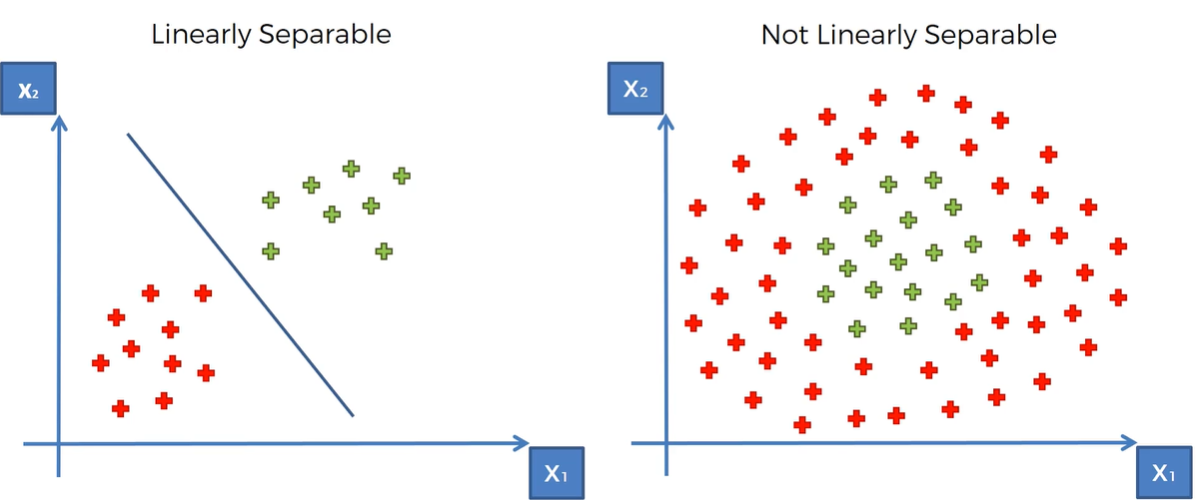

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Inicializamos un SVM lineal (sin kernel)
svmlineal = svm.SVC(kernel='linear', C=1.0)
svmlineal.fit(datos_train, etiquetas_train)

# Inicializamos un SVM con kernel RBF
svm_rbf = svm.SVC(kernel='rbf', C=1.0)
svm_rbf.fit(datos_train, etiquetas_train)

# Predecimos y evaluamos la precisión para el SVM lineal
predlineal = svmlineal.predict(datos_test)
acclineal = accuracy_score(etiquetas_test, predlineal)
print(f'Precisión del SVM lineal: {acclineal}')

# Predecimos y evaluamos la precisión para el SVM con kernel RBF
predrbf = svm_rbf.predict(datos_test)
accrbf = accuracy_score(etiquetas_test, predrbf)
print(f'Precisión del SVM con kernel RBF: {accrbf}')

# Comparamos la precisión de ambos modelos
if acclineal > accrbf:
    print('El SVM lineal tiene una mayor precisión.')
elif acclineal < accrbf:
    print('El SVM con kernel RBF tiene una mayor precisión.')
else:
    print('Ambos modelos tienen la misma precisión.')


Obtenemos con ambos modelos una precisión del 100% esto significa que los datos son fácilmente separables y esto puede ser debido al poco número de registros que tenemos en comparación al número de características, se tienen 524544 caracaterísticas, más que suficientes para poder separar los 465 datos con la mayor exactitud.

Probaremos a continuación un SVM polinómico cambiando el grado de su polinómio para ver que resultados se obtienen.

In [ ]:
# Inicializamos SVMs polinómicos con diferentes grados
grados = list(range(1,8))
svms = [svm.SVC(kernel='poly', degree=d, C=1.0) for d in grados]
acc = [0]*len(grados)

# Entrenamos los modelos y evaluamos su precisión
for i, svm_poly in enumerate(svms):

    svm_poly.fit(datos_train, etiquetas_train)
    y_pred = svm_poly.predict(datos_test)
    acc[i] = accuracy_score(etiquetas_test, y_pred)
    print(f'Precisión del SVM polinómico de grado {grados[i]}: {acc[i]}')


Después de haber probado SVMs polinómicos se sabe que a medida que se aumenta el grado del polinómo del kernel la precisión disminuye. Esto es debido a que el modelo tiende a sobreajustar ya que la función moldea mejor los datos de entrenamiento y pierde generalidad.

En grado 1 se obtiene la misma precisión que en el lineal ya que ambos tienen el mismo Kernel. Luego de grado 2 al 5 la precisión es la misma y esto puede ser porque al tener relativamente pocos datos de validación es posible que falle en el mismo número de datos. Luego cuando el grado es mayor que 5 la precisión se va perdiendo gradualmente.

Por tanto, estos son los tres modelos que mejor clasifican:

In [ ]:
# Crear un diccionario con los datos
datos = {
    "Tipo de modelo": ["SVM sin kernel (lineal)", "SVM kernel RBF", "SVM kernel polinómico grado 2"],
    "Precisión": [acclineal, accrbf, acc[1]]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(datos)

# Mostrar el DataFrame
print(df)

## 2.- (1 punto)


Se van a utilizar las 10 imágenes no usada ni para el entranamiento ni para el test con el modelo sin kernel (lineal) es el que mayor precisión tiene junto con el de kernel RBF.

In [ ]:
# Predecimos y evaluamos la precisión para el SVM lineal.
predlineal = svmlineal.predict(datos_10)
acclineal = accuracy_score(etiquetas_10, predlineal)
print(f'Precisión del SVM lineal: {acclineal}')

El clasificador tiene una axactitud perfecta del 100% con las 10 imágenes que nunca ha visto.

# Práctica 4 (Diagnóstico de cáncer con genes)
Objetivo (3 puntos)


El fichero “genes.csv” contiene información de dos genes y la posibilidad de tener cáncer o no. Con todo ello
se quiere crear un modelo que permita hacer un diagnóstico para un nuevo paciente teniendo en cuenta su
similitud en un campo de n-dimensiones
Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que
necesites para resolver las siguientes cuestiones.


1) Haz todo el preprocesamiento para crear un set de entrenamiento, otro de validación y uno de test
qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes. (0,5
puntos)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos desde el archivo CSV
data = pd.read_csv('genes.csv')

# Separar características (X) de etiquetas (y)
X = data.drop('CancerPresent', axis=1)
y = data['CancerPresent']

# Dividir el conjunto de datos en entrenamiento y test (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dividir el conjunto de entrenamiento en entrenamiento y validación (75% entrenamiento, 25% validación)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento final:", X_train_final.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test_scaled.shape)

Tamaño del conjunto de entrenamiento final: (1800, 2)
Tamaño del conjunto de validación: (600, 2)
Tamaño del conjunto de prueba: (600, 2)


2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué? (1 punto)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir diferentes configuraciones de n_neighbors y metric
n_neighbors_values = [1, 3, 5, 10, 15, 20, 25, 30]
metric_values = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming']

best_accuracy = 0
best_config = None

# Iterar sobre todas las configuraciones
for n_neighbors in n_neighbors_values:
    for metric in metric_values:
        # Crear el clasificador KNN con la configuración actual
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Entrenar el clasificador utilizando el conjunto de entrenamiento final
        knn_classifier.fit(X_train_final, y_train_final)

        # Predecir las etiquetas utilizando el conjunto de validación
        y_pred = knn_classifier.predict(X_val)

        # Calcular la precisión utilizando las etiquetas verdaderas
        accuracy = accuracy_score(y_val, y_pred)

        # Imprimir la precisión para la configuración actual
        print(f"n_neighbors={n_neighbors}, metric={metric}: Accuracy={accuracy}")

        # Actualizar la mejor configuración si encontramos una precisión mejor
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = (n_neighbors, metric)

print("\nMejor configuración encontrada:")
print("n_neighbors={}, metric={}".format(best_config[0], best_config[1]))
print("Precisión:", best_accuracy)


n_neighbors=1, metric=euclidean: Accuracy=0.8883333333333333
n_neighbors=1, metric=manhattan: Accuracy=0.89
n_neighbors=1, metric=minkowski: Accuracy=0.8883333333333333
n_neighbors=1, metric=chebyshev: Accuracy=0.885
n_neighbors=1, metric=hamming: Accuracy=0.6366666666666667
n_neighbors=3, metric=euclidean: Accuracy=0.9133333333333333
n_neighbors=3, metric=manhattan: Accuracy=0.9116666666666666
n_neighbors=3, metric=minkowski: Accuracy=0.9133333333333333
n_neighbors=3, metric=chebyshev: Accuracy=0.9183333333333333
n_neighbors=3, metric=hamming: Accuracy=0.5966666666666667
n_neighbors=5, metric=euclidean: Accuracy=0.9233333333333333
n_neighbors=5, metric=manhattan: Accuracy=0.92
n_neighbors=5, metric=minkowski: Accuracy=0.9233333333333333
n_neighbors=5, metric=chebyshev: Accuracy=0.9316666666666666
n_neighbors=5, metric=hamming: Accuracy=0.575
n_neighbors=10, metric=euclidean: Accuracy=0.9266666666666666
n_neighbors=10, metric=manhattan: Accuracy=0.9266666666666666
n_neighbors=10, metri

3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos
hiperparametros del punto anterior para ver su evolución. (1 punto)

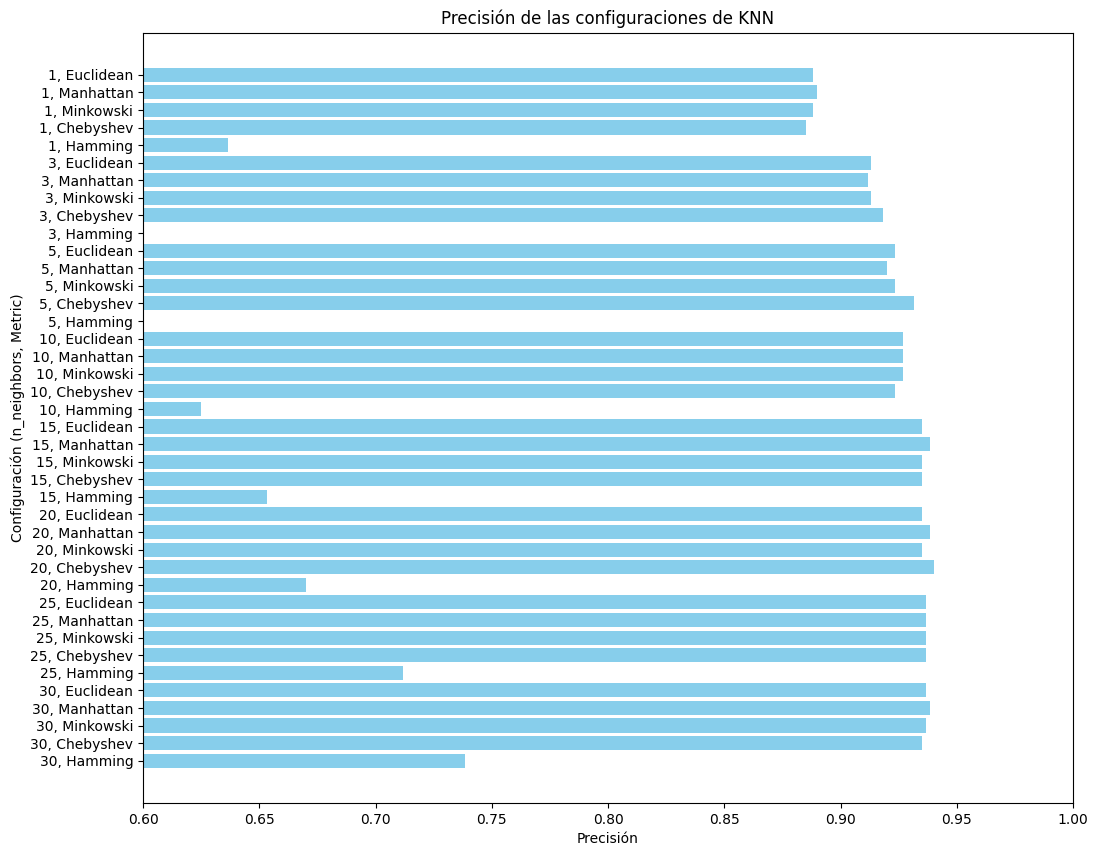

In [ ]:
import matplotlib.pyplot as plt

# Definir los resultados obtenidos
configurations = [
    ("1, Euclidean", 0.8883),
    ("1, Manhattan", 0.89),
    ("1, Minkowski", 0.8883),
    ("1, Chebyshev", 0.885),
    ("1, Hamming", 0.6367),
    ("3, Euclidean", 0.9133),
    ("3, Manhattan", 0.9117),
    ("3, Minkowski", 0.9133),
    ("3, Chebyshev", 0.9183),
    ("3, Hamming", 0.5967),
    ("5, Euclidean", 0.9233),
    ("5, Manhattan", 0.92),
    ("5, Minkowski", 0.9233),
    ("5, Chebyshev", 0.9317),
    ("5, Hamming", 0.575),
    ("10, Euclidean", 0.9267),
    ("10, Manhattan", 0.9267),
    ("10, Minkowski", 0.9267),
    ("10, Chebyshev", 0.9233),
    ("10, Hamming", 0.625),
    ("15, Euclidean", 0.935),
    ("15, Manhattan", 0.9383),
    ("15, Minkowski", 0.935),
    ("15, Chebyshev", 0.935),
    ("15, Hamming", 0.6533),
    ("20, Euclidean", 0.935),
    ("20, Manhattan", 0.9383),
    ("20, Minkowski", 0.935),
    ("20, Chebyshev", 0.94),
    ("20, Hamming", 0.67),
    ("25, Euclidean", 0.9367),
    ("25, Manhattan", 0.9367),
    ("25, Minkowski", 0.9367),
    ("25, Chebyshev", 0.9367),
    ("25, Hamming", 0.7117),
    ("30, Euclidean", 0.9367),
    ("30, Manhattan", 0.9383),
    ("30, Minkowski", 0.9367),
    ("30, Chebyshev", 0.935),
    ("30, Hamming", 0.7383)
]

# Separar las configuraciones y las precisiones
labels, accuracies = zip(*configurations)

# Crear el gráfico de barras
plt.figure(figsize=(12, 10))
plt.barh(labels, accuracies, color='skyblue')
plt.xlabel('Precisión')
plt.ylabel('Configuración (n_neighbors, Metric)')
plt.title('Precisión de las configuraciones de KNN')
plt.xlim(0.6, 1)  # Limitar el eje x para mejorar la visualización
plt.gca().invert_yaxis()  # Invertir el eje y para que la configuración más alta esté arriba
plt.show()


4) Utiliza el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv” que obtendremos del dataset proporcionado. (0,5 puntos)